<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

# Table of Contents <a id="top"></a>
#### 1. [Introduction](#part1)

#### 2. [Explore the Data](#part2)
   - [2.1 Importing Given Data](#part2.1)
   - [2.2 Overview of Data](#part2.2)
   - [2.3 Relationship of Variables](#part2.3)
   - [2.4 Overall Findings](#part2.4)
   
   
#### 3. [Data Preprocessing](#part3)
   - [3.1 Replacing Values](#part3.1)
   - [3.2 Outliers](#part3.2)
   - [3.3 Numerical Variables Distribution](#part3.3)
   - [3.4 Train Test Split](#part3.4)
   - [3.5 Missing Data](#part3.5)  

#### 4. [Data Transformation](#part4)
- [4.1 Numerical Variables Transformation](#part4.1)
    - [4.1.1 Numerical Transformation of Item_Weight](#part4.1.1)
    - [4.1.2 Numerical Transformation of Item_Visibility](#part4.1.2)
    - [4.1.3 Numerical Transformation of Item_MRP](#part4.1.3)

- [4.2 Categorical Data Encoding](#part4.2)
    - [4.2.1 Ordinal Encoding](#part4.2.1)
    - [4.2.2 Target Mean Encoding](#part4.2.2)
    
- [4.3 Binning/Discretization](#part4.3)

#### 5. [Feature Engineer](#part5)
- [5.1 Adding Columns](#part5.1)
- [5.2 Dropping Columns](#part5.2)
- [5.3 Scaling of Data](#part5.3)

#### 6. [Linear Regression Modelling](#part6)

#### 7. [Summary](#part6)

# 1. Introduction <a id="part1"></a>

Sales forecasting is crucial when managing supermarket outlets. It allows companies to estimate the sales and make better decisions making for the future. In this report, we will explore the dataset that contains data collected from various supermarket outlets and stores in different cities. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

To do so, I will be:
1. Performing Data Exploration
2. Performing Data Pre-processing 
3. Performing Data Transformation,

in hopes to allow the supermarket management team to understand more of the products and stores which is vital in increasing sales. 

[Back to top](#top)

# 2. Exploring Data <a id="part2"></a>

In [1]:
# import the pacakges
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from feature_engine.imputation import MeanMedianImputer

#from sklearn.pipeline import Pipeline
import feature_engine.imputation as mdi
from feature_engine.outliers import Winsorizer
from feature_engine.transformation import PowerTransformer
from feature_engine.encoding import OrdinalEncoder
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.discretisation import EqualFrequencyDiscretiser
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.encoding import MeanEncoder


import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

## 2.1 Importing Given Data<a id="part2.1"></a>

In [2]:
# Load Data
data_sm = pd.read_csv('./data/supermarket.csv')
data_sm.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


[Back to top](#top)

## 2.2 Overview of Data<a id="part2.2"></a>

Let's look at the data set and have a basic understanding before we dive in deeper.

### Detailed Information (From Assignment Document)

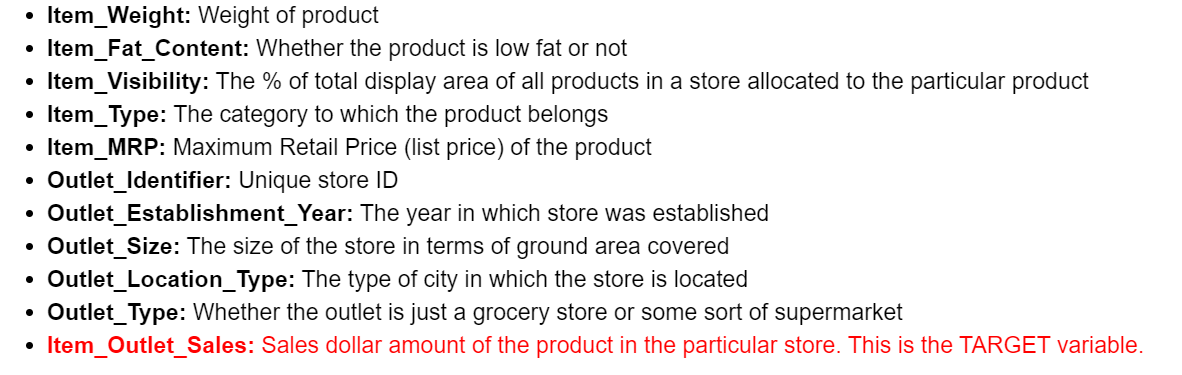

In [3]:
data_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


.info() shows a concise summary of the Data Frame. We can tell that some of the columns contain null values. We can also see the data type of each column.

In [4]:
data_sm.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

.dtypes() shows solely the data type of each variable, based on this, let's find the categorical and numerical variables.

### Categorical Variables

In [5]:
#find categorical variables (will be useful for later)

cat_cols = [c for c in data_sm.columns if data_sm[c].dtypes=='O']
data_sm[cat_cols].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


### Numerical Variables

In [6]:
num_cols = [n for n in data_sm.columns if data_sm[n].dtypes!='O']
data_sm[num_cols].head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [7]:
data_sm.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<a id="notUseful"></a>
.describe() shows the statistics of each numerical variable, e.g., the 25th, 50th and 75th quantiles, the mean, standard deviation and minimum and maximum value. Comparing these parameters we can quickly understand whether our features are in a similar scale. In this case, they are not. 

For e.g., Item_weight takes values 4.555-21.350 whereas Item_Visibility takes values 0-0.328, and Item_MRP takes values 31.29-266.88.

Observations:

1. One thing to note is that, it is unlikely that some items have 0 visibility (as seen, min value of Item_Visibility is 0).
2. Outlet_Establishment_Year is not that helpful, perhaps we can create a new column to show how old the establishments are instead. 


### Cardinality of Variables

In [8]:
data_sm.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Observations:
1. There are 1559 different items.
2. Even though there are many items, there's only 16 Item_Type.
3. There are 10 stores.
4. Count of Item_MRP is much higher than count of Item_Identifier, this suggests that Item_MRP may differ in different stores.

### Percentage of Missing Values<a id="missingValues"></a>

In [9]:
data_sm.isnull().mean().sort_values(ascending=True)

Item_Identifier              0.000000
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
Item_Weight                  0.171653
Outlet_Size                  0.282764
dtype: float64

Only Item_Outlet_Sales and Outlet_Size has missing values but the percentage of missing values are considered quite high. This mean that imputation of missing values would be required. 

[Back to top](#top)

## 2.3 Relationship of Variables<a id="part2.3"></a>

Using Tibco Spotfire, let's study the relationship between each variable and the target variable by plotting either a bar or line chart.

### Item_Identifier<a id="itemIdentifier"></a>
It is quite hard to visualise the Item_Identifier against our target variable due to the large quantity so let us examine this variable first. 

In [10]:
data_sm['Item_Identifier'].head(20)

0     FDA15
1     DRC01
2     FDN15
3     FDX07
4     NCD19
5     FDP36
6     FDO10
7     FDP10
8     FDH17
9     FDU28
10    FDY07
11    FDA03
12    FDX32
13    FDS46
14    FDF32
15    FDP49
16    NCB42
17    FDP49
18    DRI11
19    FDU02
Name: Item_Identifier, dtype: object

By looking at the first 20 Item_Identifier, I realised there is a trend. The ID start with either "FD", "DR" or "NC" followed by numbers. We could possibly split the Items into 3 main categories, e.g. Food, drinks and Non-Consumables.

### Item_Outlet_Sales VS Item_Visibility

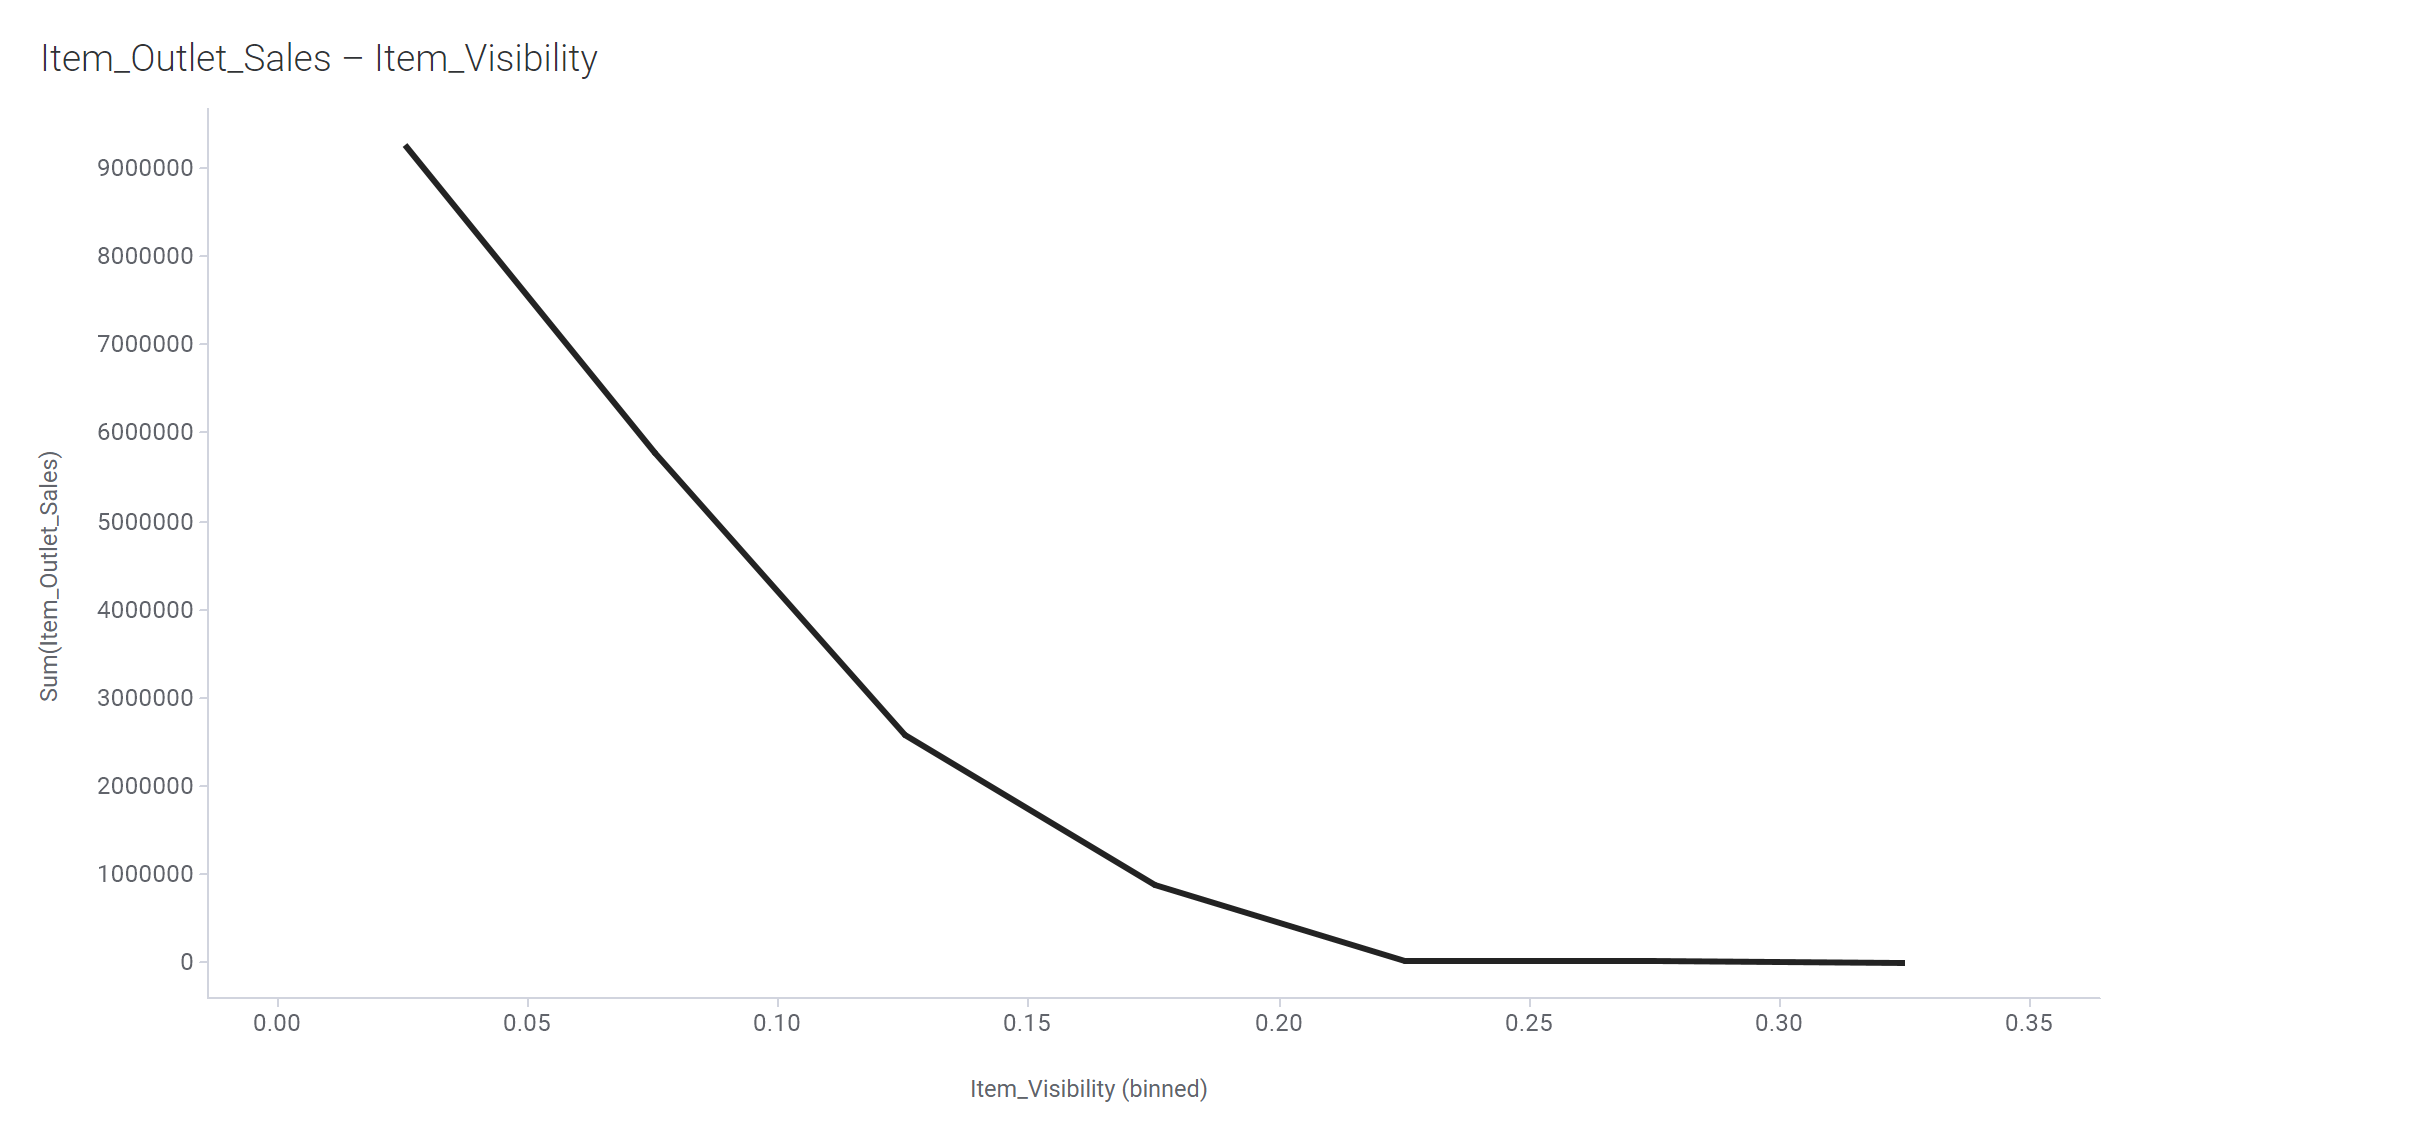

Usually when we compare item sales and item visibility, we would expect a positive linear relationship as the higher the exposure of the item, the more likely the customers can see and buy it. However, it seems to be untrue in this scenario, as observed from the line graph, it seems that item visibility does not have much impact on the item sales. In fact, items that has high visibility have a much lower sales compared to items with lower visibility.

### Item_Outlet_Sales VS Item_Fat_Content

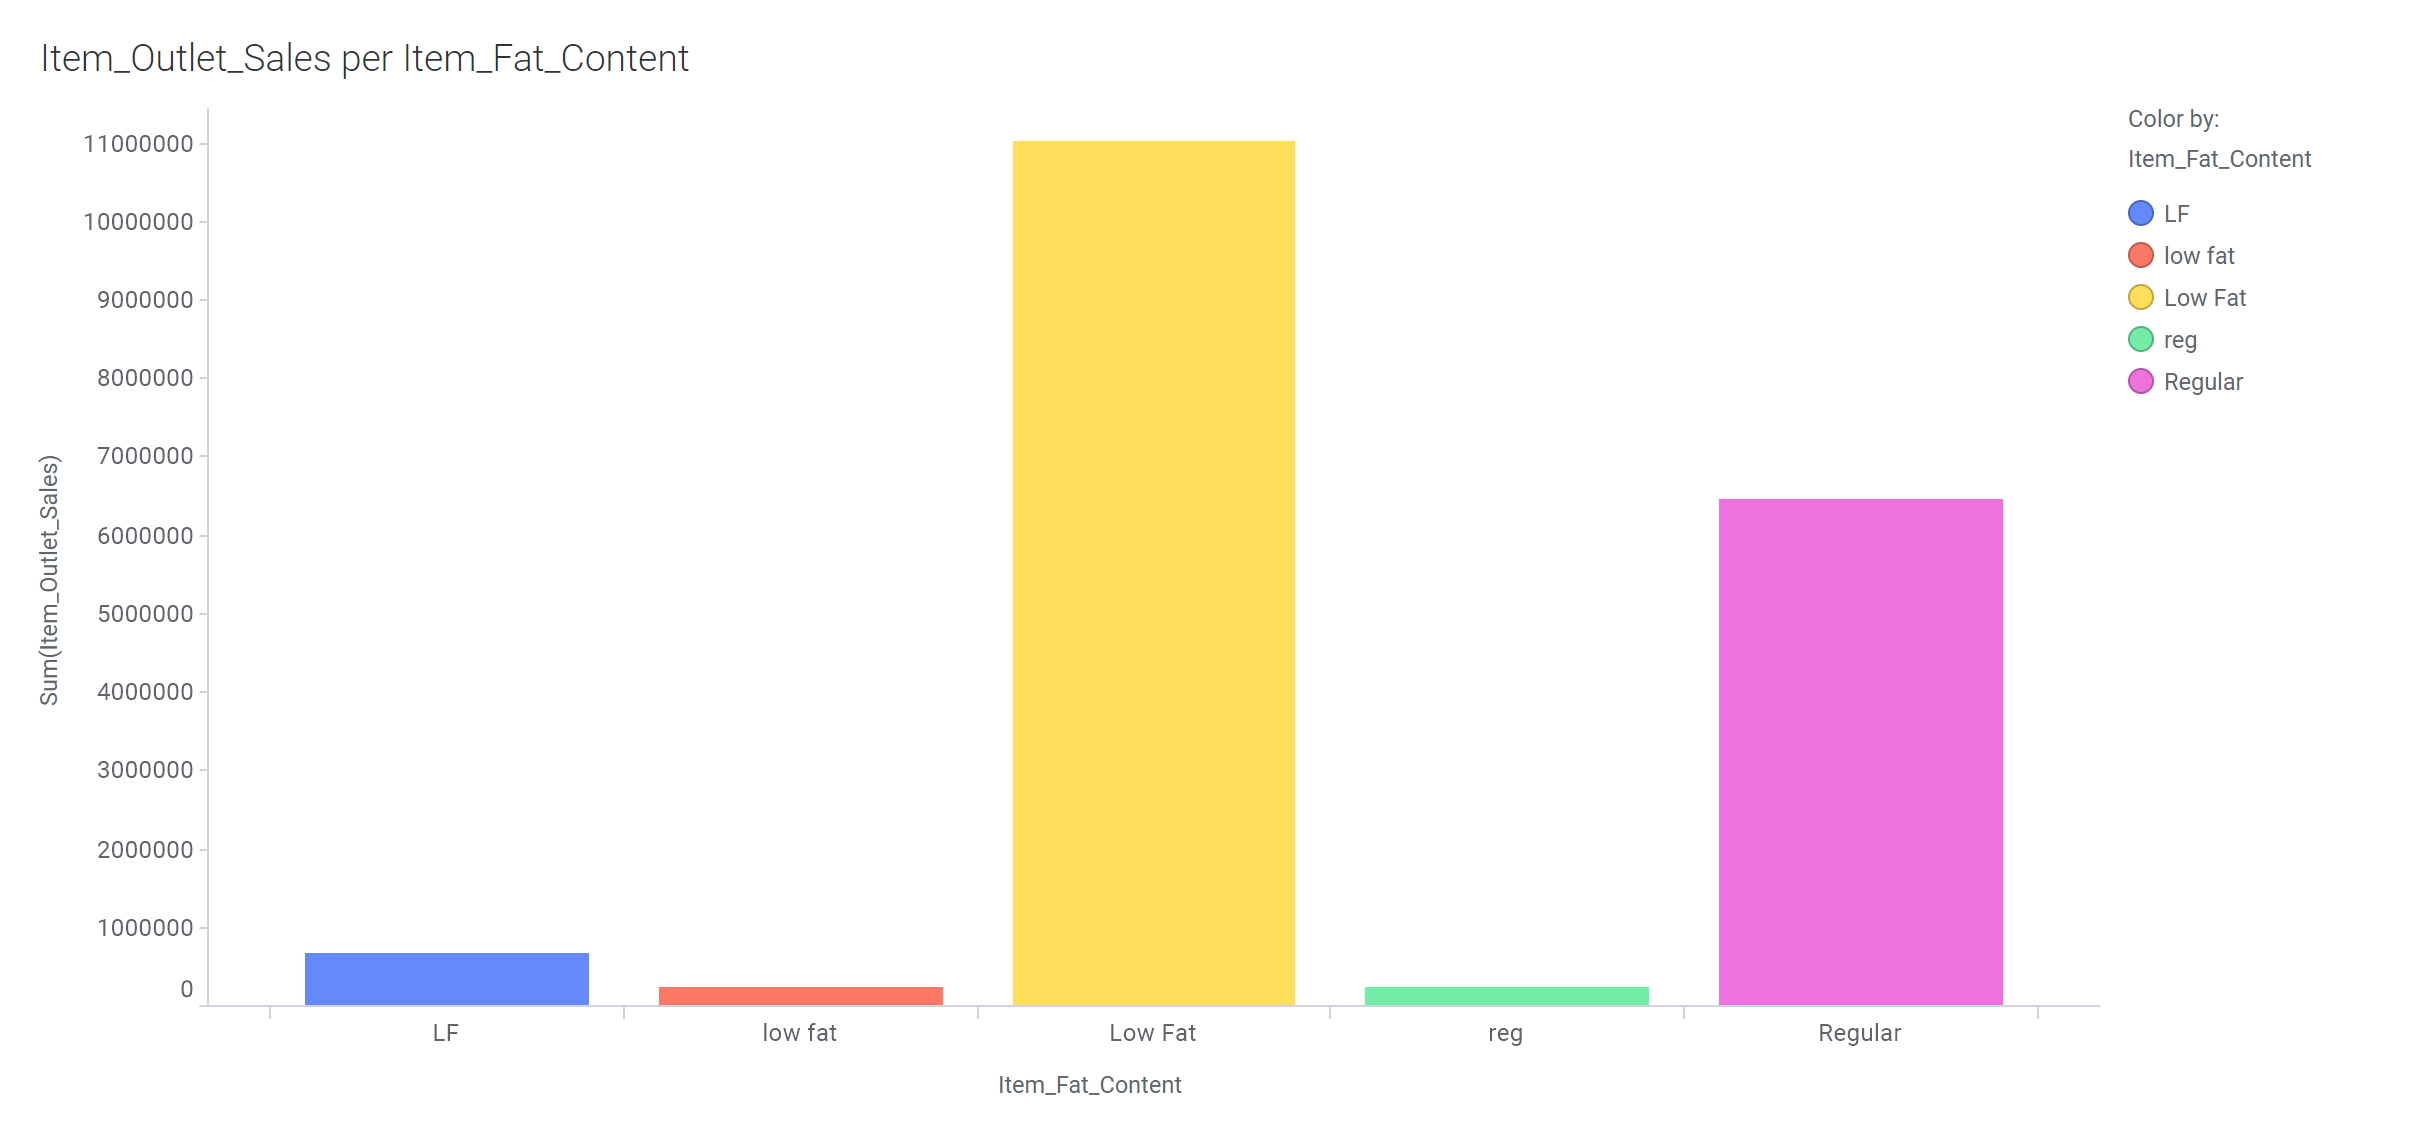

Inconsistent values observed, same values have the same meaning but is in different forms. 

Low Fat, low fat and LF are all Low Fat values; Regular and reg are both Regular values.

Key thing to note that there's no null values in this column but some of the items are inedible as discovered previous when we study the [Item_Identifier](#itemIdentifier), some products are non-consumables. 


### Item_Outlet_Sales VS Item_Type

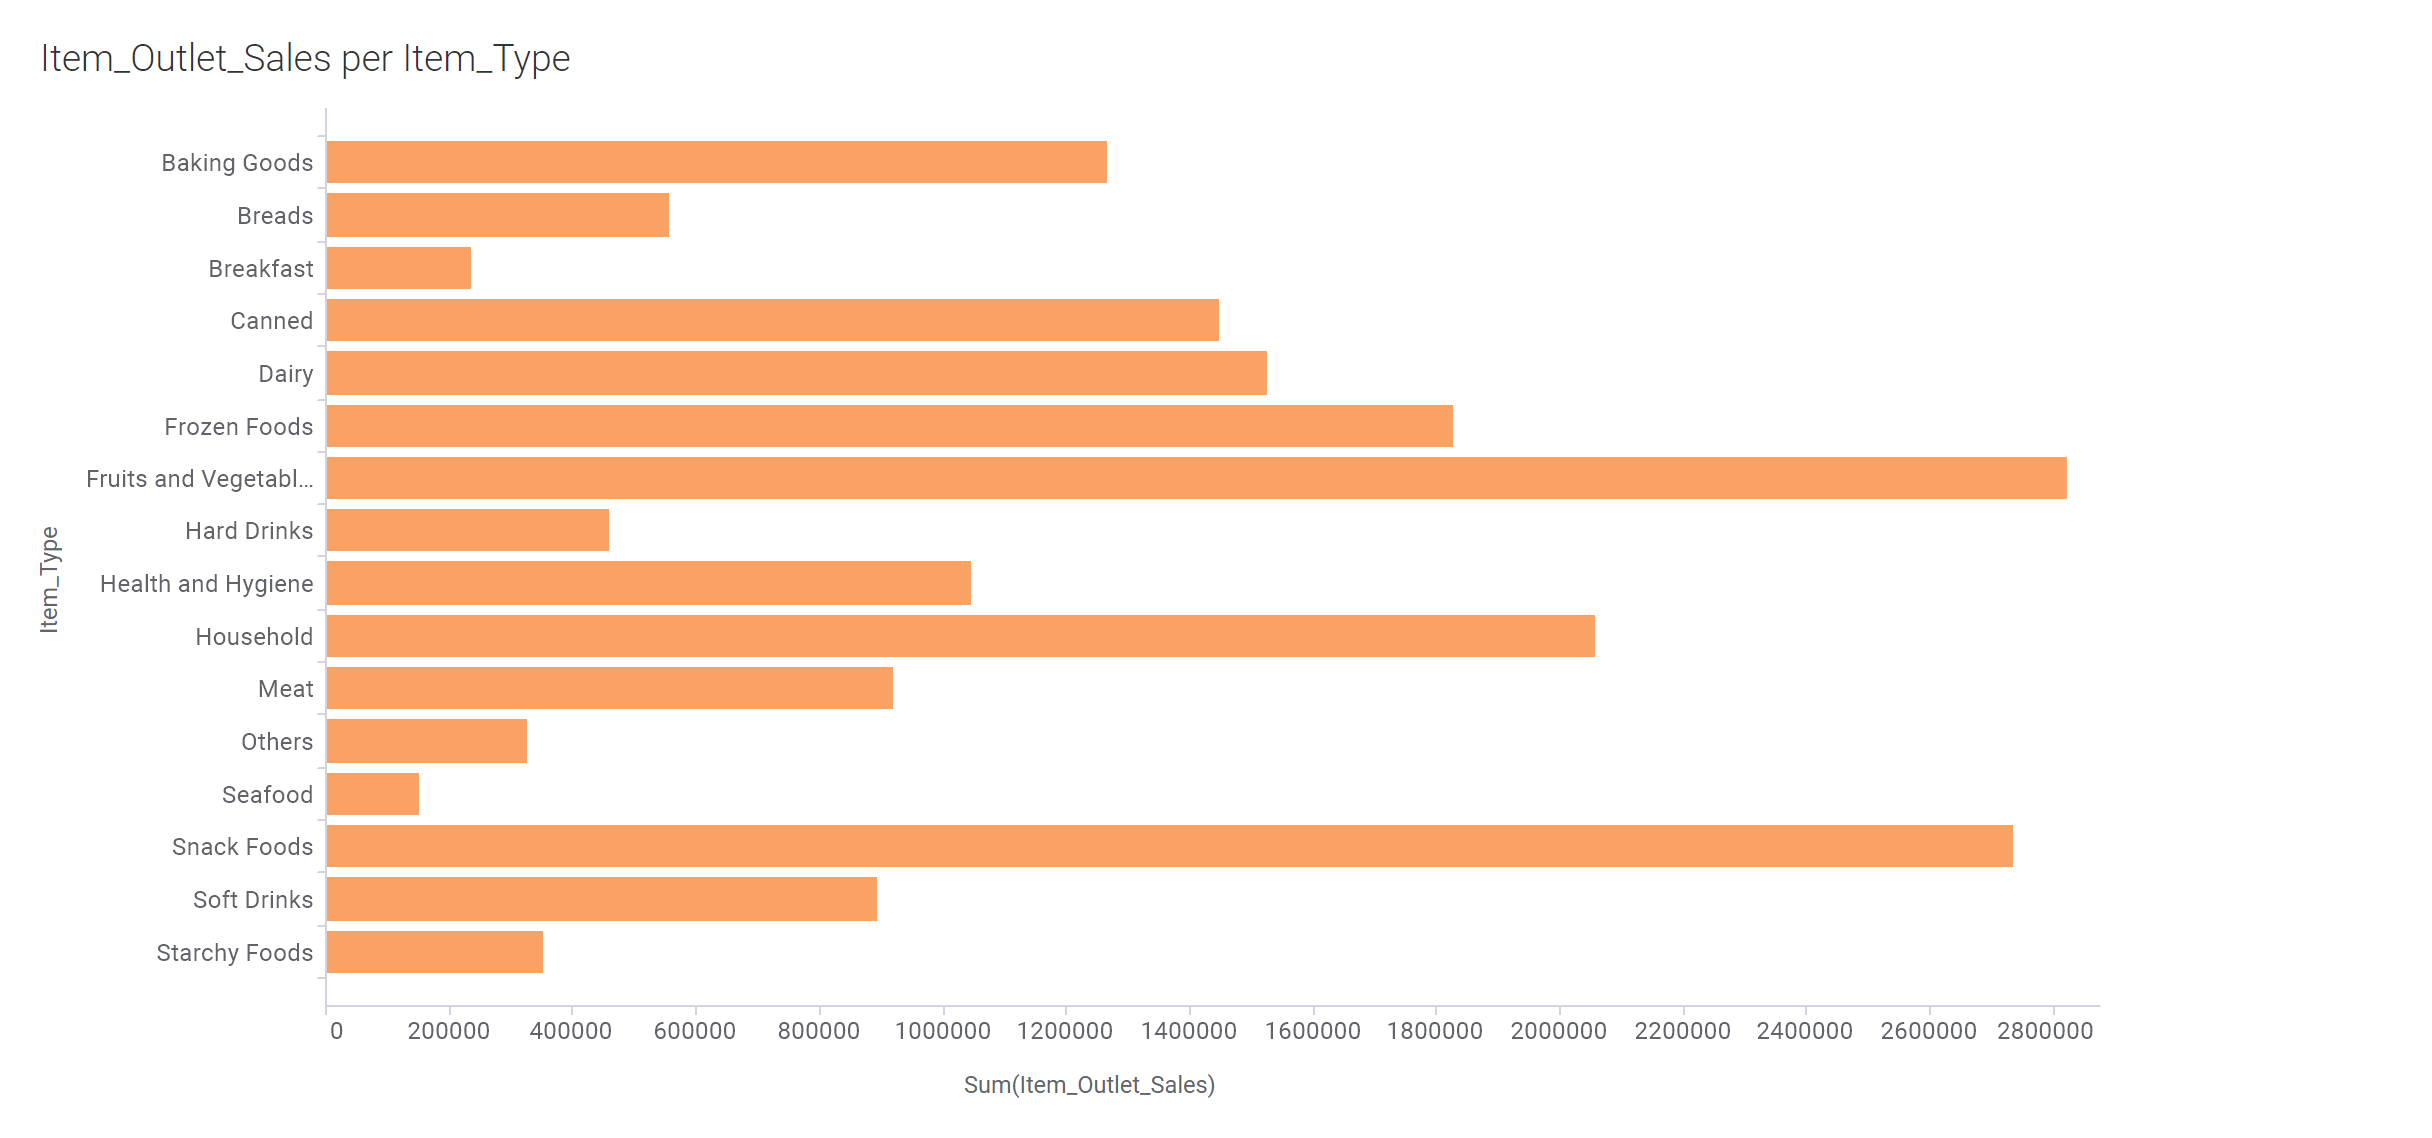

From this visualisation, 'Snack Foods' and 'Fruits and Vegetables' has accumulated the most sales, which suggests that products in these categories are more popular hence resulting in more sales. 

### Item_Outlet_Sales VS Item_Weight

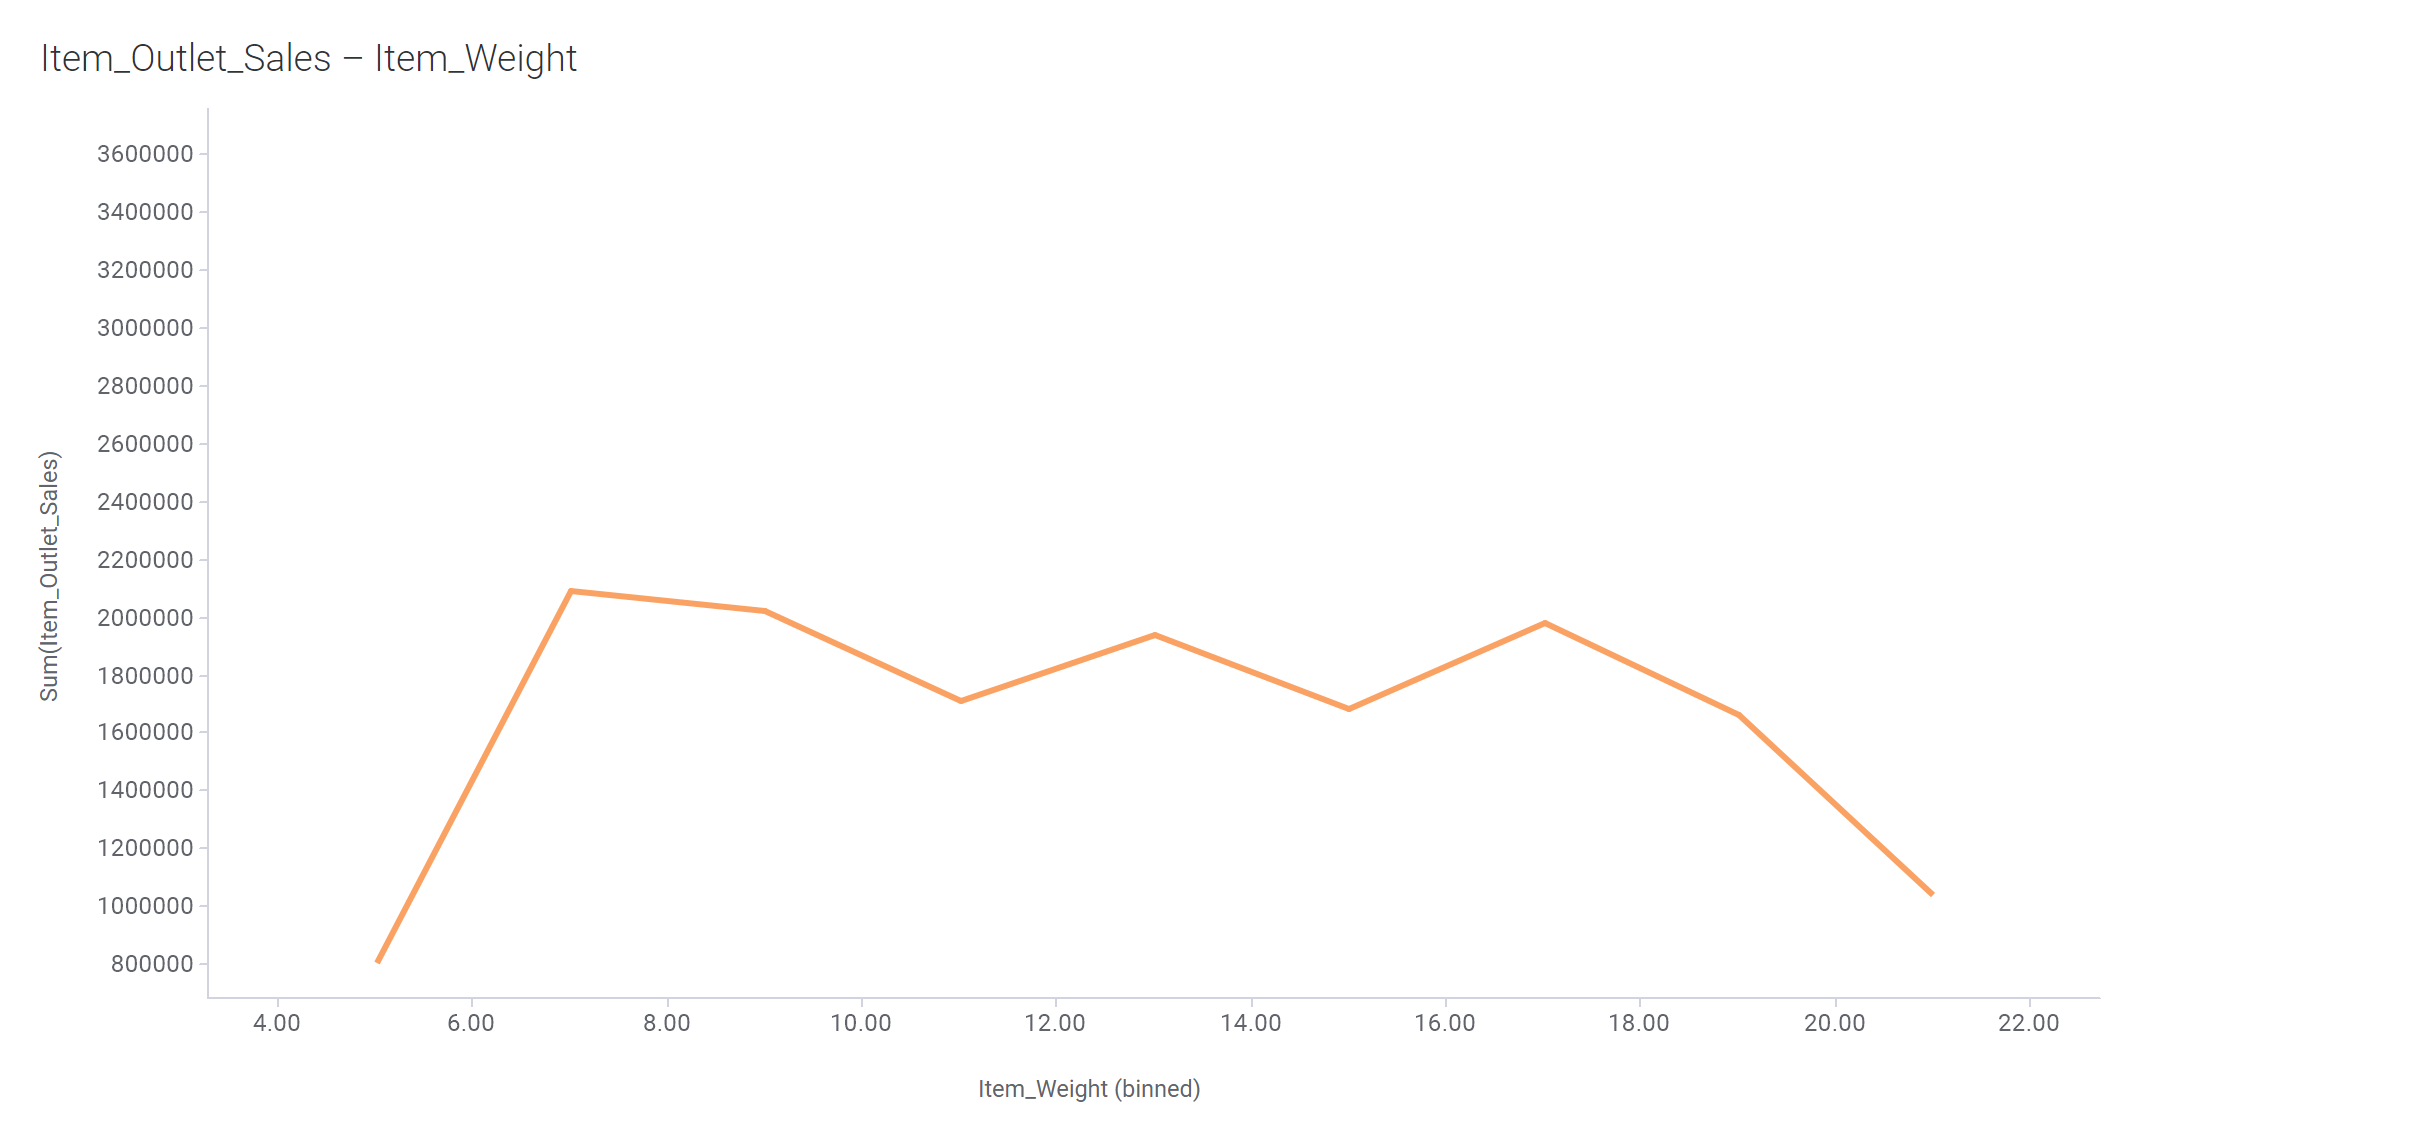

It does not seem like Item Weight is a factor affecting Item_Outlet_sales, the relationship between them is rather weak. However, this does make sense as items with lighter weight are usually food which is usually cheaper than other products in Household category for e.g.. As for the heavier items, people seldom buy very heavy things from Supermarket which might explain why the sales are lower. 

### Item_Outlet_Sales VS Outlet_Establishment_Year

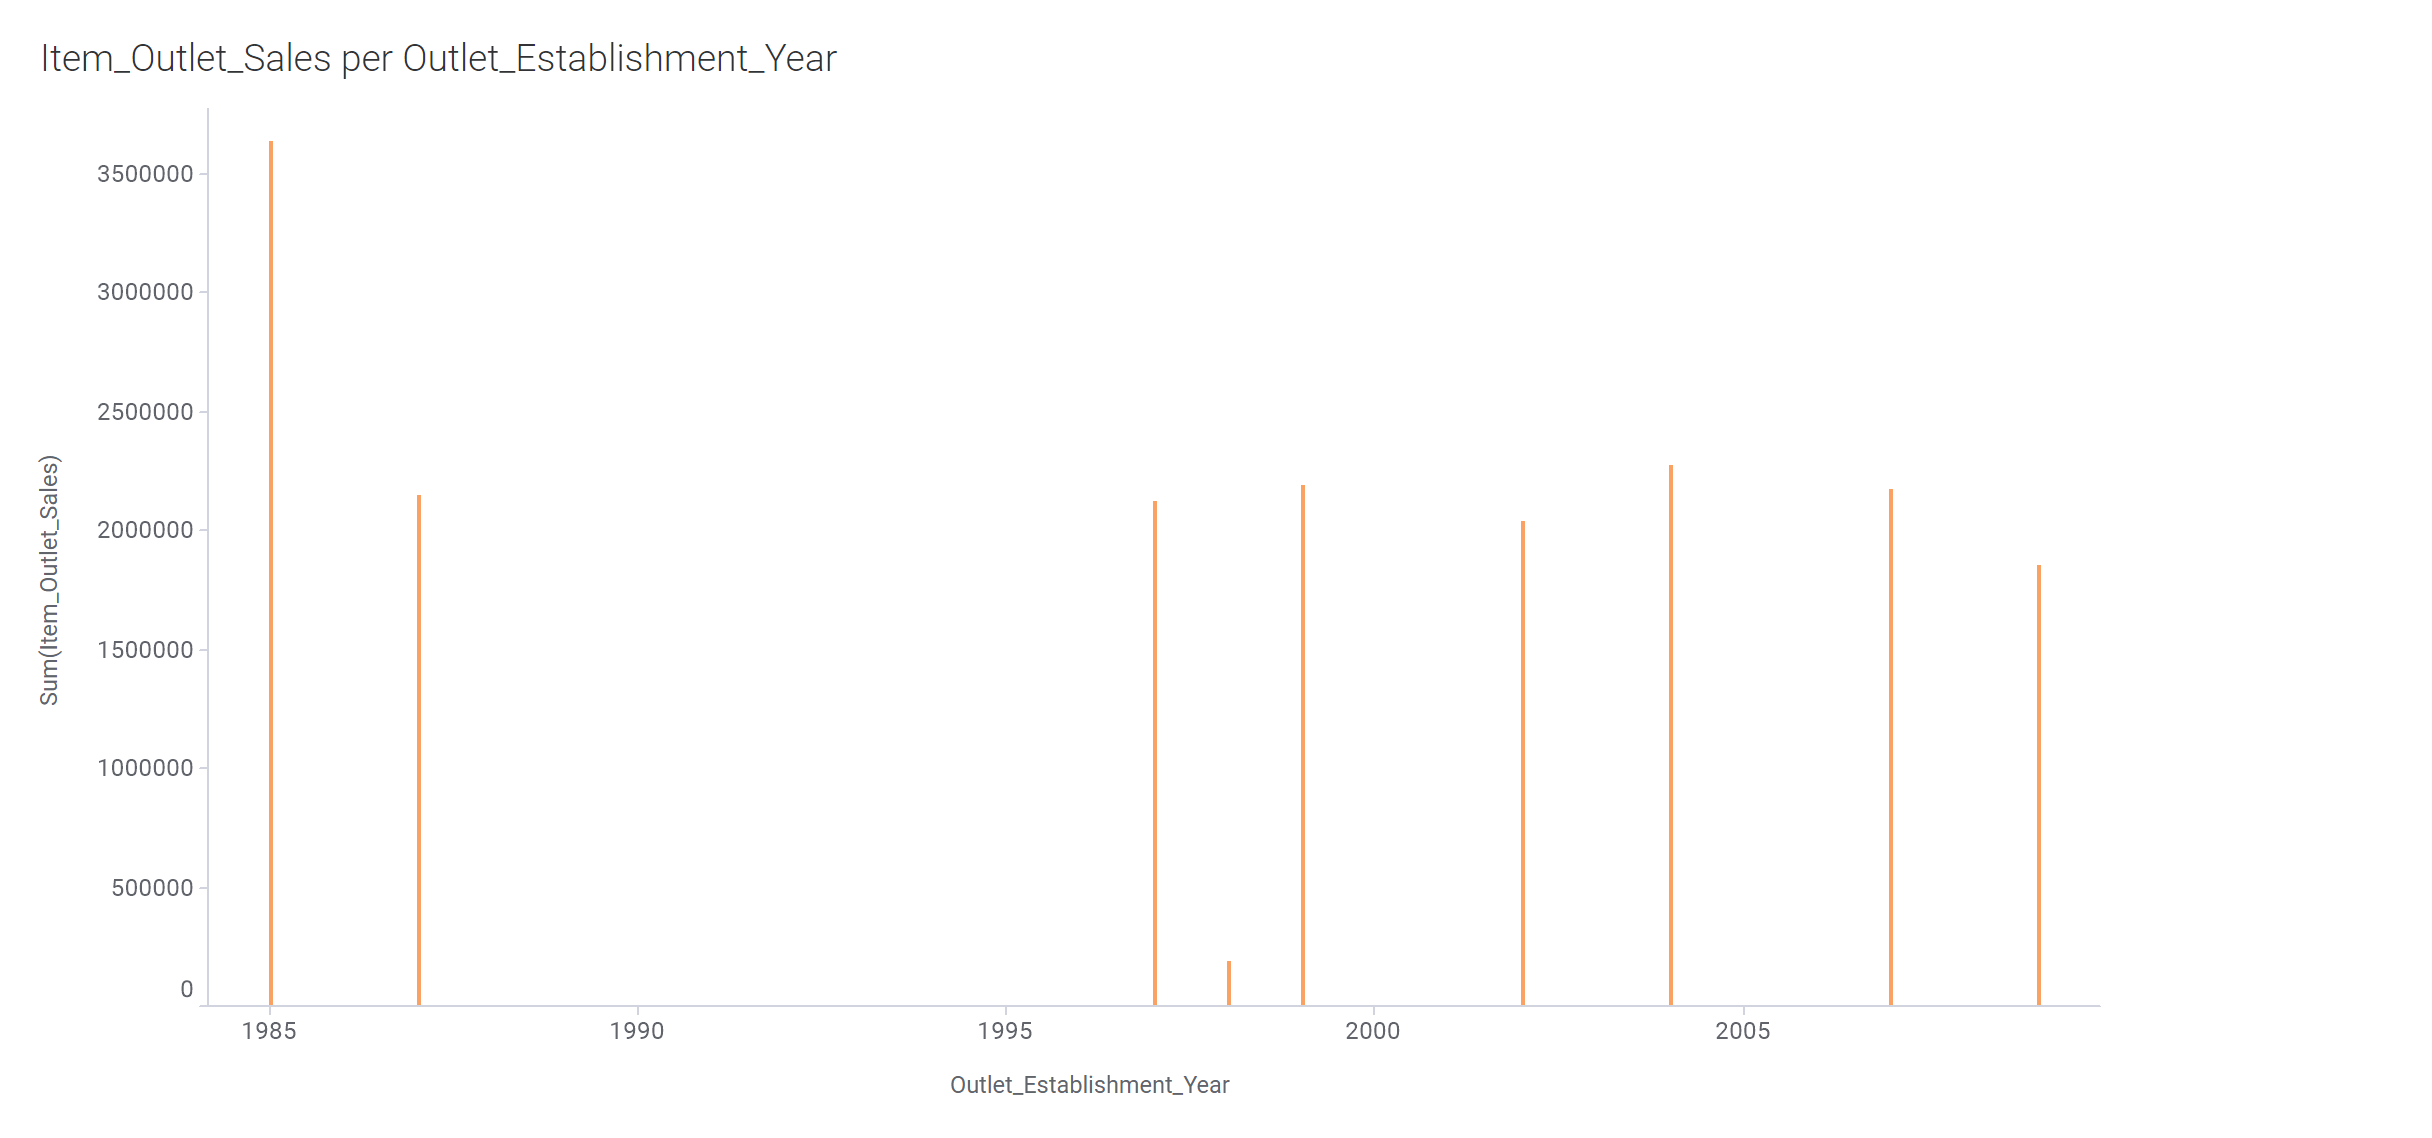

As mentioned [earlier](#notUseful), Outlet_Establishment_Year is not that helpful, perhaps we can create a new column to show how old the establishments are instead to better relate the two variables.

### Item_Outlet_Sales VS Outlet_Identifier <a id="lowSales"></a>

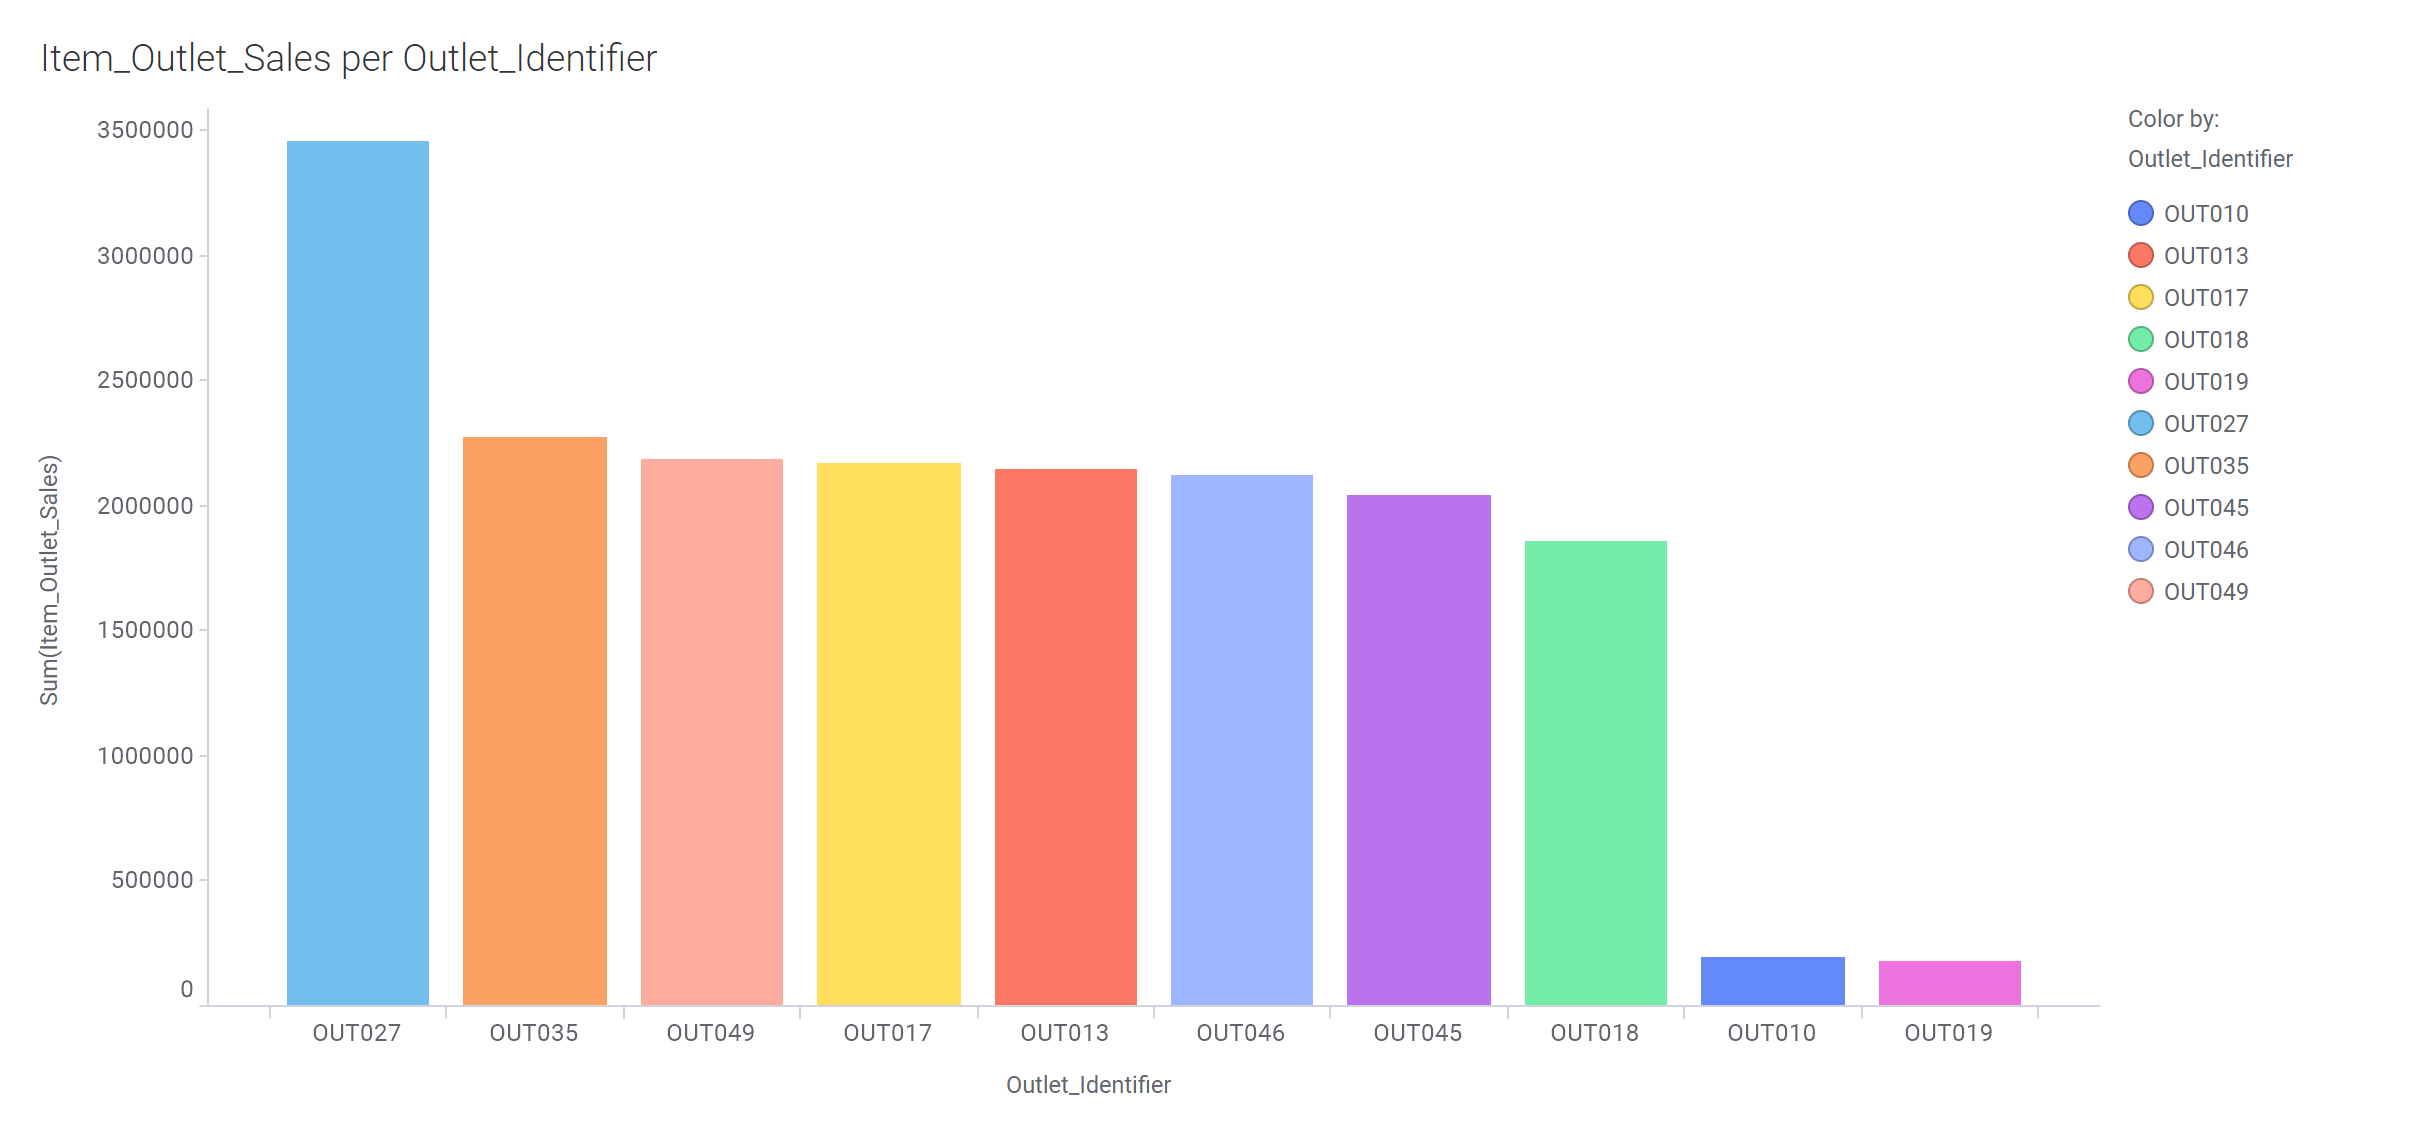

Stores with Outlet_Identifier OUT010 and OUT019 have significantly lower amount of sales.

### Item_Outlet_Sales VS Outlet_Location_Type

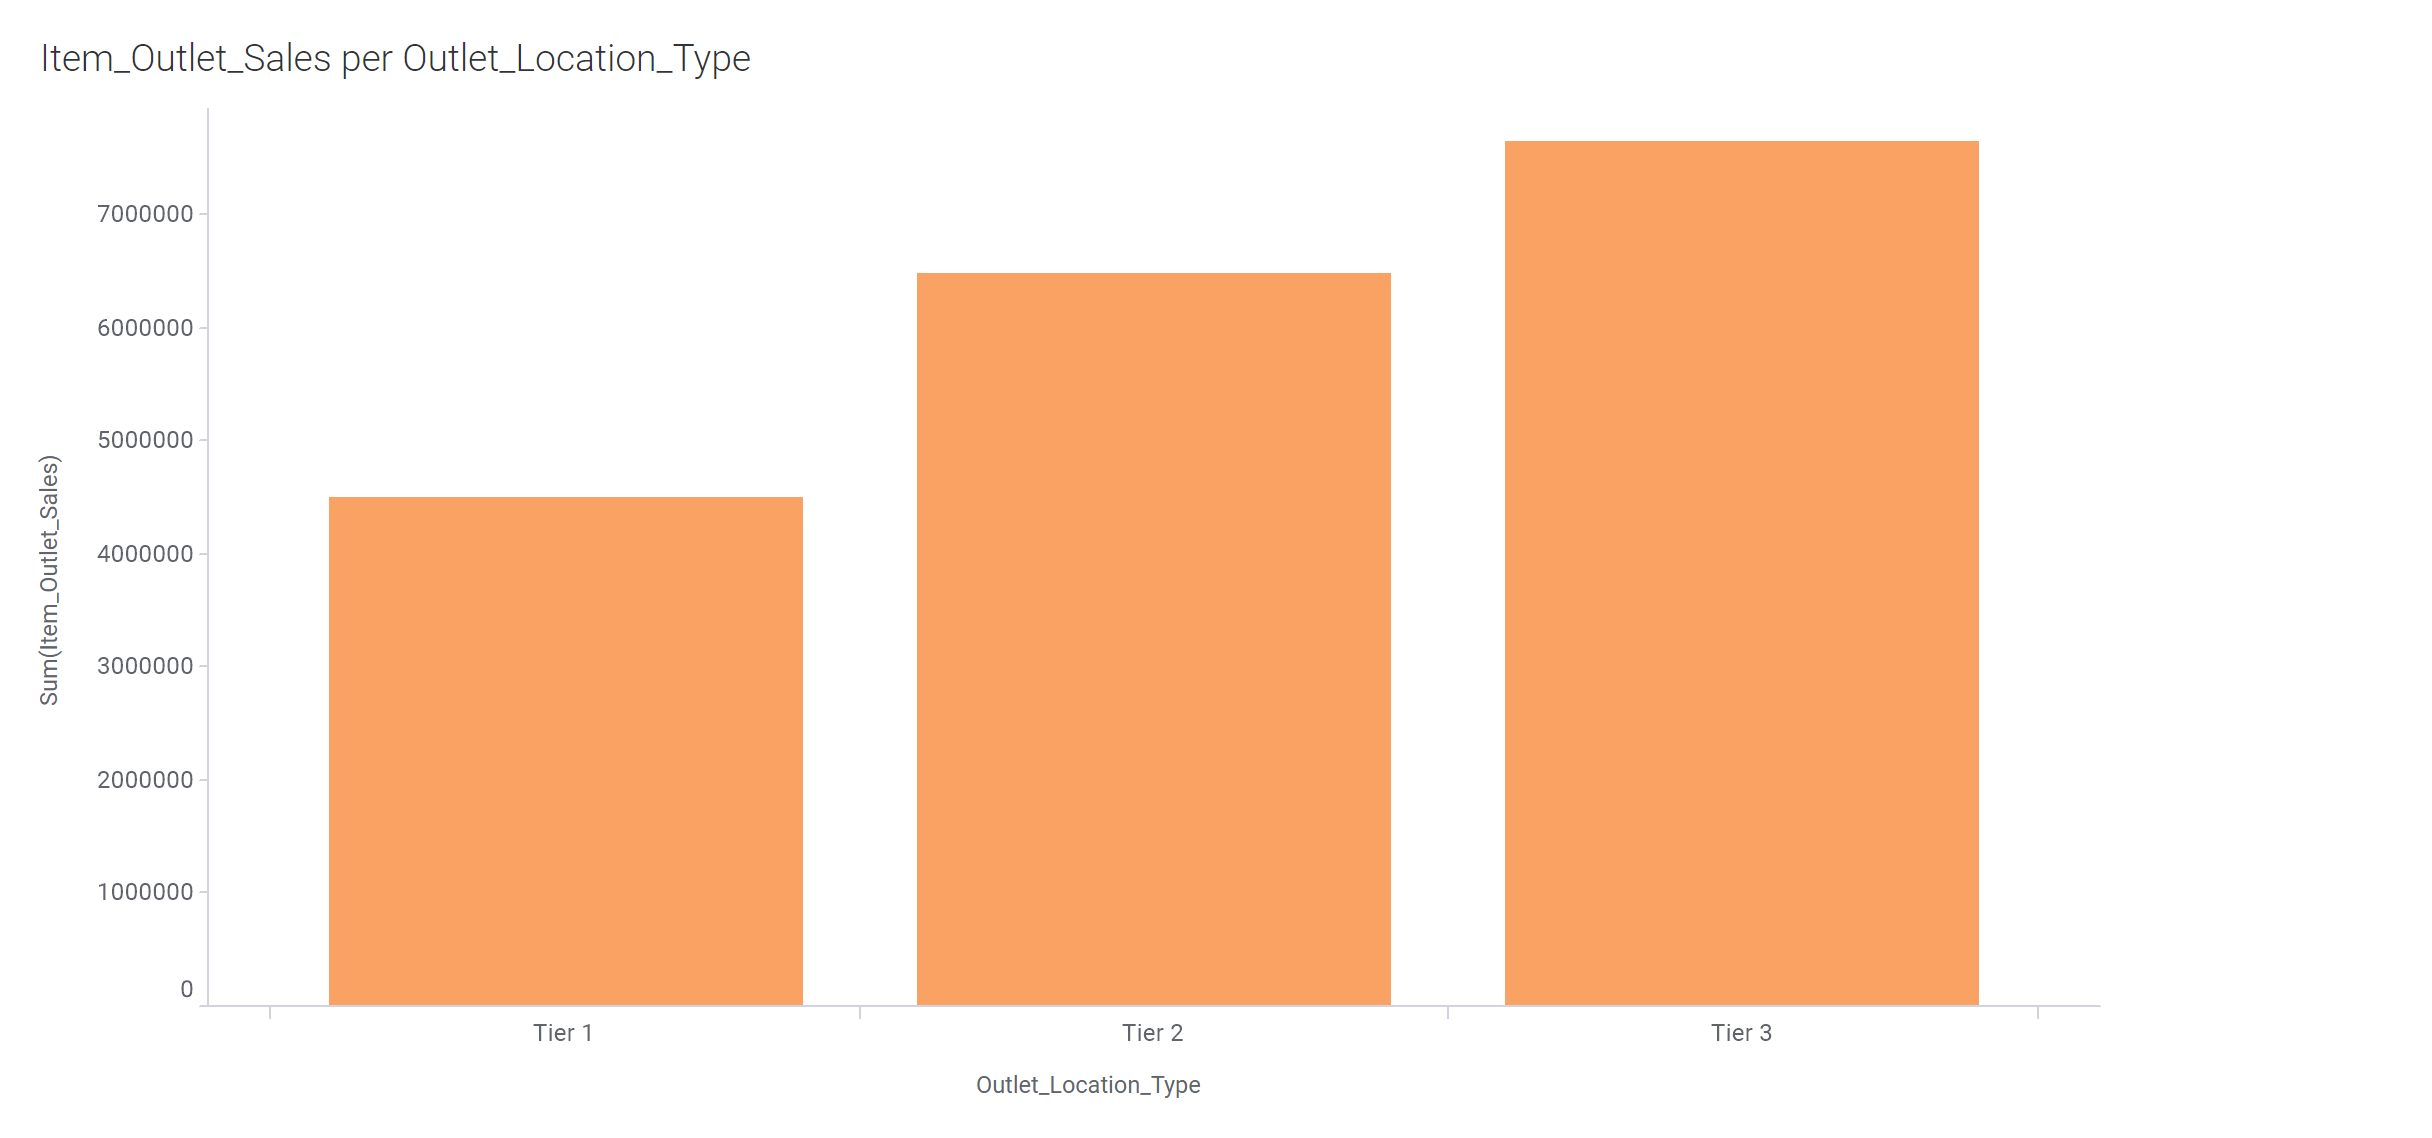

There are 3 tiers of outlet location, tier 1, tier 2 and, tier 3. Tier 3 has the highest amount of sales.

### Item_Outlet_Sales VS Outlet_Size

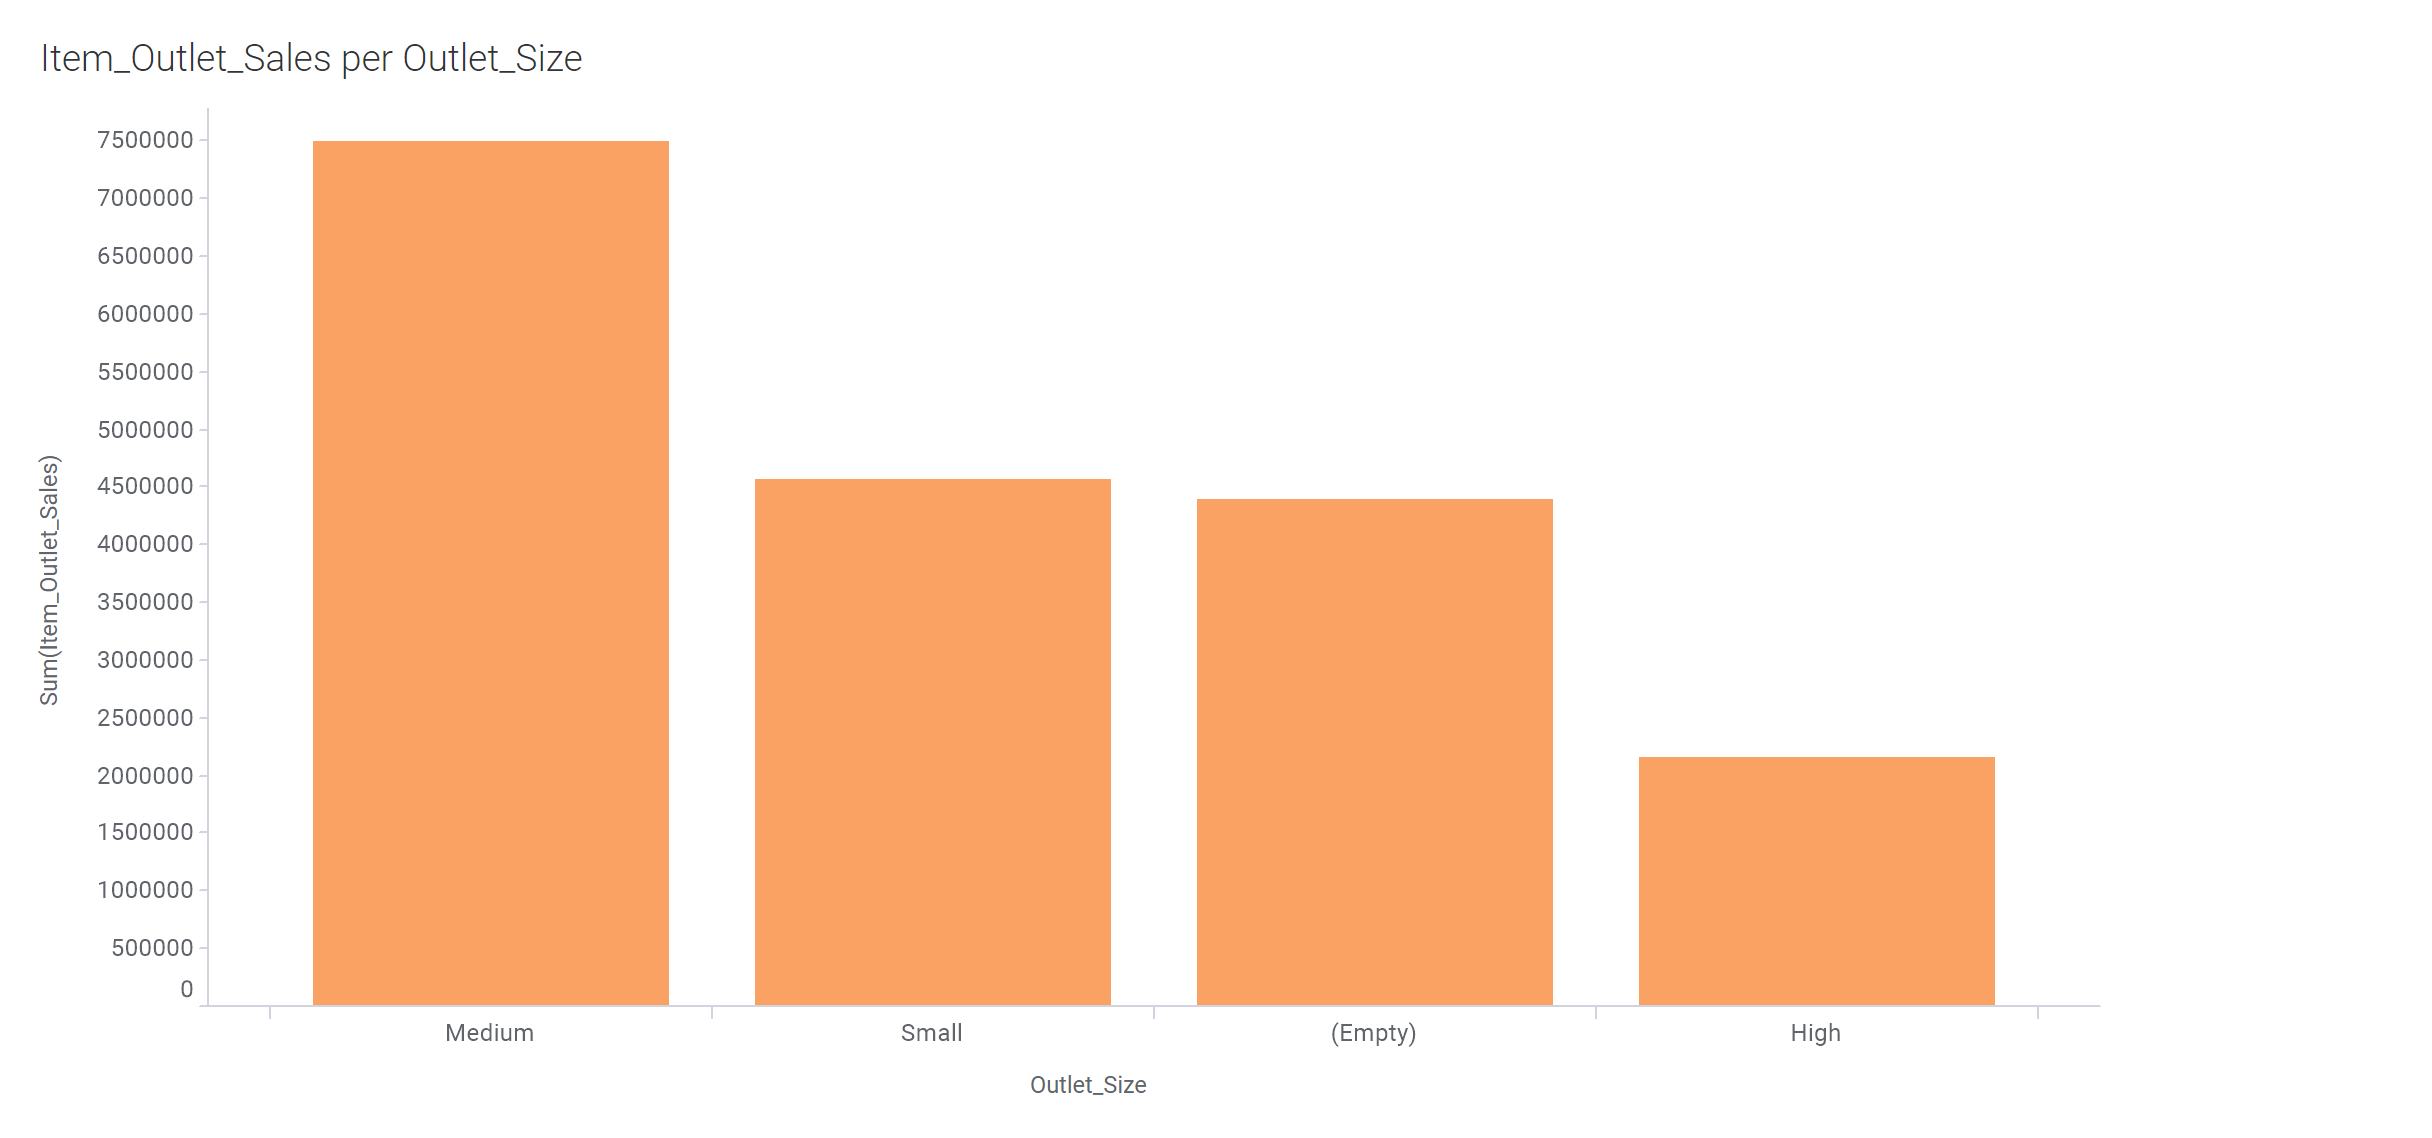

There are 3 types of Outlet Size, but quite a number of missing values hence, needs imputation.
Medium size has the highest amount of sales and High size has the least amount of sales. Usually, we would think that larger outlet size would generate more sales because there's more items to be sold and people tend to prefer larger outlets as they will have a more variety of items. We can perhaps find out more about the reason behind this; why is it not as what we expected.

In [11]:
data_sm.Outlet_Size.value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

From this, we can see that the smallest number of outlet size is High, which explains why the sales is relatively lower compared to Medium and Small as they have a much higher count of outlets.

### Item_Outlet_Sales VS Outlet_Type

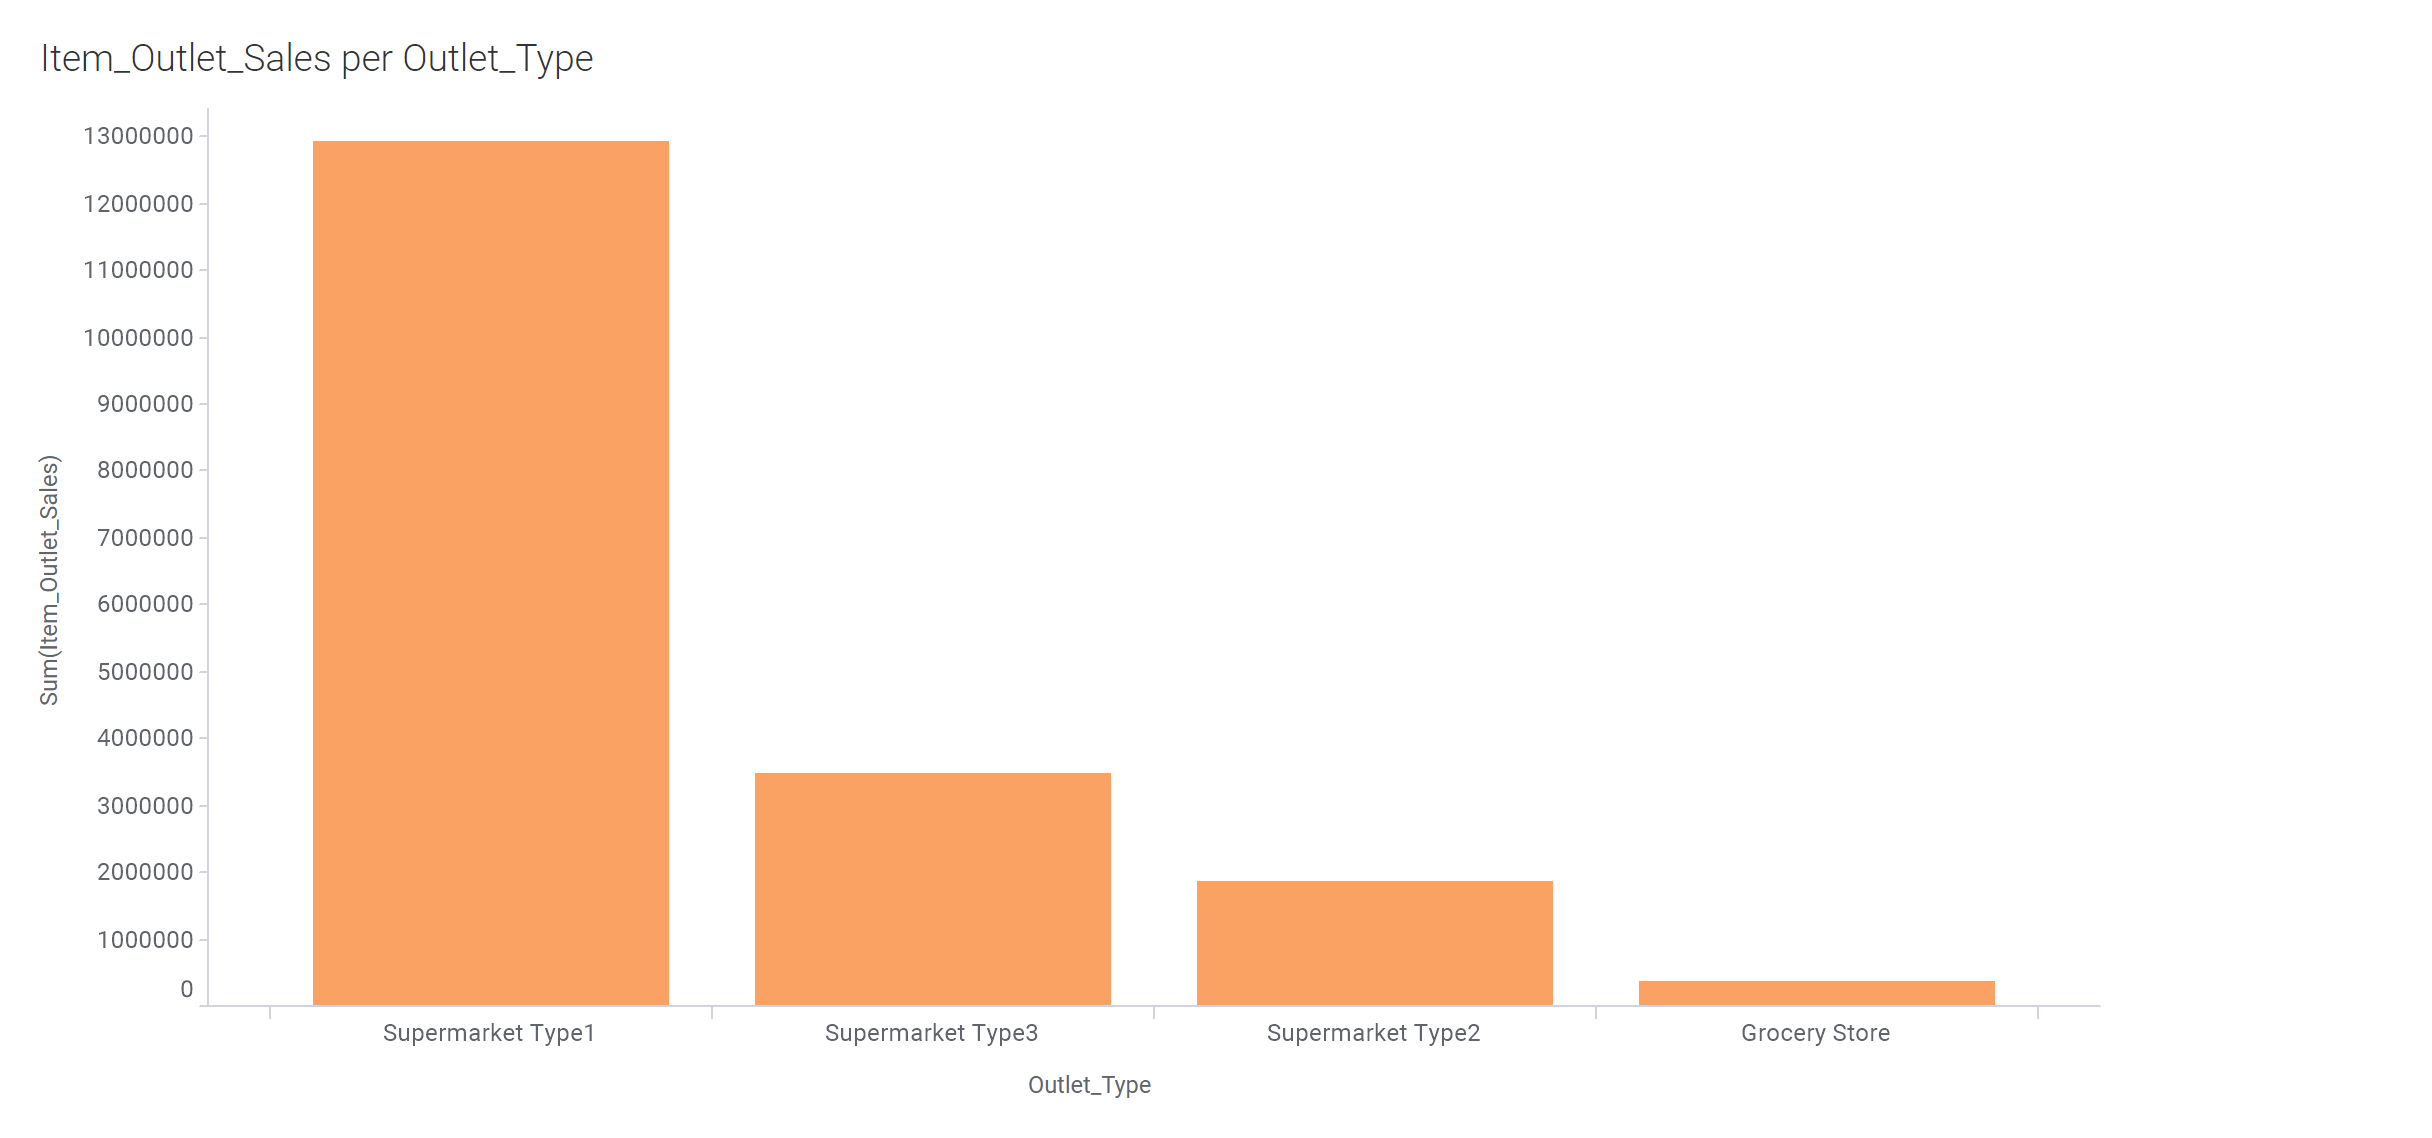

There are 4 outlet types namely Supermarket Type1, Supermarket Type2, Supermarket Type3 and Grocery Store. Supermarket Type1 has the highest sales amount.

### Item_Identifier VS Outlet_Identifier

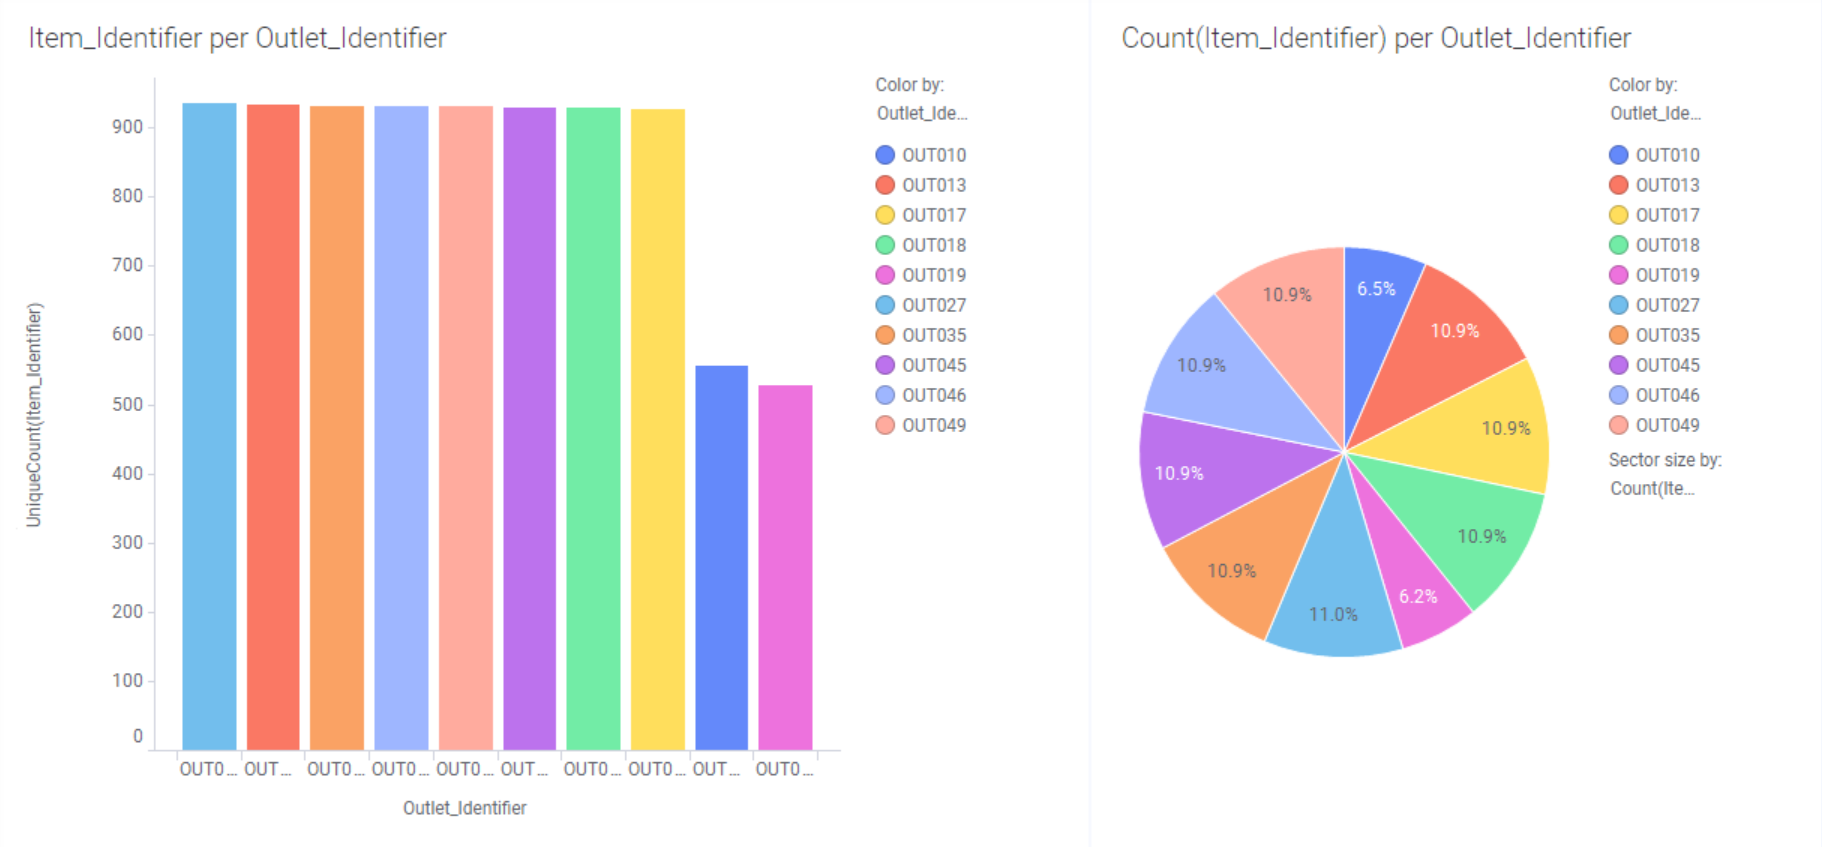

Almost all the outlets have similar numbers of Items (around 10.9% to 11%) but "OUT10" and "OUT19" have a lower count of items which quite explained our [previous observation](#lowSales) whereby stores with Outlet_Identifier OUT010 and OUT019 have significantly lower amount of sales.

[Back to top](#top)

## 2.4 Overall Findings<a id="part2.4"></a>

### Interesting Observations:
1. Stores with Outlet_Identifier OUT010 and OUT019 have significantly lower amount of sales.
2. Count of Item_MRP is much higher than count of Item_Identifier
3. Supermarket Type1 has the highest sales amount.
4. Tier 3 has the highest amount of sales.
5. Stores with Outlet_Identifier OUT010 and OUT019 have significantly lower amount of sales.

### Steps to carry out based on observations:

#### Replace Values
- Low Fat, low fat and LF are all Low Fat values; Regular and reg are both Regular values.
- Some products are non consumables but has either Low Fat or Regular attached to them.

#### Creating New Columns 
- Create a new column to replace Outlet_Establishment_Year
- Create a new column for item category based on trend of "Item_Identifier"

#### Impute Missing Values
- Item_Weight and Outlet_Size needs to be imputed 
- Need to further look into Item_Visibility because it is unlikely that some item's visibility is 0

[Back to top](#top)

# 3.Data Preprocessing<a id="part3"></a>

In this section, we will be cleaning dirty data, imputing missing values and handling outliers to ensure high-quality data for our model.

## 3.1 Replace Values for dirty data<a id="part3.1"></a>

In the previous section, we found out that there are some inconsistent values in the "Item_Fat_Content" column so we need to replace the values to one consistent value. (e.g. Low Fat and Regular)

In [12]:
#Transform 'Low Fat' Incosistent Values 
data_sm['Item_Fat_Content'] = data_sm['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')

#Transform 'Regular' Incosistent Values 
data_sm['Item_Fat_Content'] = data_sm['Item_Fat_Content'].replace('reg', 'Regular')

In [13]:
#Check if values are replaced
data_sm.Item_Fat_Content.value_counts(dropna=False)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Inconsistent values in "Item_Fat_column" are replaced.

[Back to top](#top)

## 3.2 Check for Outliers<a id="part3.2"></a>

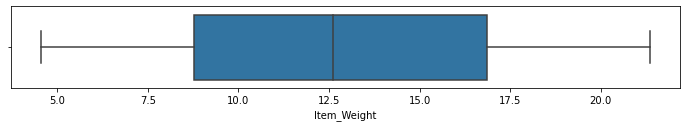

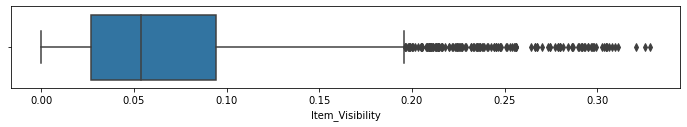

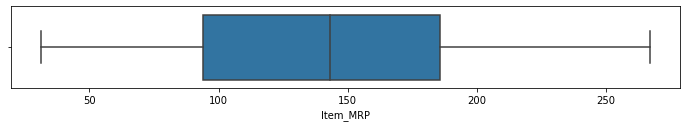

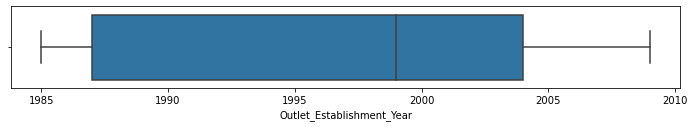

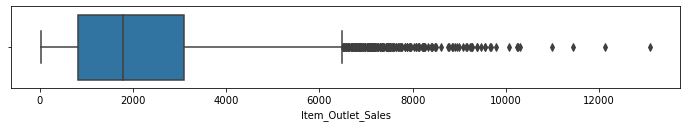

In [14]:
for column in num_cols:
    plt.figure(figsize=(12, 1.5))
    sns.boxplot(data_sm[column])

Based on the box plot diagram above, "Item_Visibility" and "Item_Outlet_Sales" ,amongst other numerical variables, have outliers.
However, since "Item_Outlet_Sales" is our target variable hence we should not perform any transformation on it. We will decide if we should handle the outliers in "Item_Visibility". 

### Handling Outliers

In [15]:
# function to create histogram, Q-Q plot and boxplot

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Let's take a look at the current distribution of "Item_Visibility".

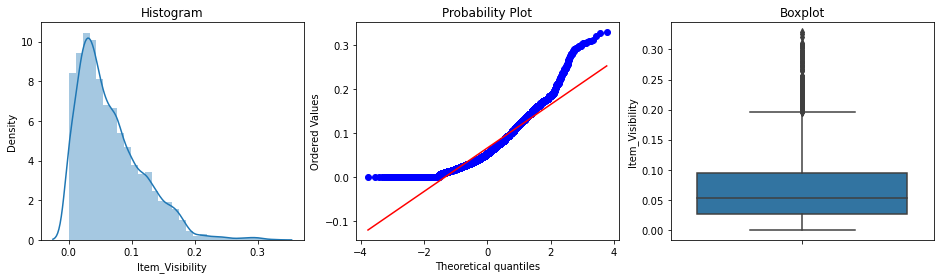

In [16]:
diagnostic_plots(data_sm, 'Item_Visibility')

Based on the Histogram, it seems to be right skewed. However, referring to our observations previously, we noticed that items with 0 visibility also yield a large amount of sales hence it is unlikely that these items have 0 visibility in the supermarkets. The only time when the item has 0 visibility is when the item is out of stock/not in season, but it does not make sense since they are producing a high amount of sales. 

Therefore, before we deal with the outliers of 'Item_Visibility', let's +1 to the data values so that item will not have 0 visibility.

In [17]:
# original data

data_sm['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

In [18]:
# after +1 to it 

data_sm['Item_Visibility'] = data_sm['Item_Visibility'] +1
data_sm['Item_Visibility']

0       1.016047
1       1.019278
2       1.016760
3       1.000000
4       1.000000
          ...   
8518    1.056783
8519    1.046982
8520    1.035186
8521    1.145221
8522    1.044878
Name: Item_Visibility, Length: 8523, dtype: float64

I did try different methods to handle the outliers in Item_Visibility but none of them gave me satisfied results. So I tried to study more about the outliers in “Item_Visibility”, and I came to realise that this step might not be necessary. It makes sense for Item_Visibility to have outliers as some products take up more space due to their size hence the area allocated to the product would be bigger, leading to outliers. Hence, we will not perform any methods to handle the outliers in 'Item_Visibility'. However we did +1 to all values in Item_Visibility,  to ensure that all items have at least 1% visibility. 

Handling outliers may not always be good especially if you handled outliers inappropriately. Outliers can be important data especially when our data set is not that big. I saw this comment made by a user in [Quora](https://www.quora.com/Why-would-you-not-remove-outliers-from-a-data-set) and he said “But the real world is filled with outliers, so if you want to model the real world you can't delete the parts of it you think don't belong.” which makes a lot of sense therefore, in combine of all these reasons, I decided not to handle the outliers in “Item_Visibility”.

And as for 'Item_Outlet_Sales', since it is the target variable, we should not touch it as much as possible hence we will also not be handling the outliers in 'Item_Outlet_Sales'. 

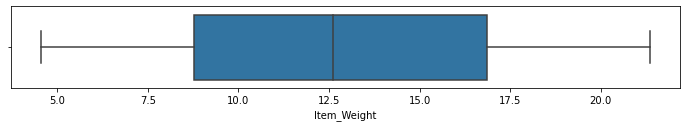

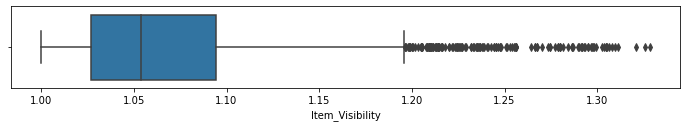

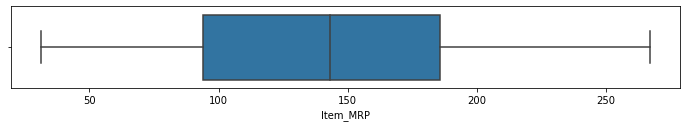

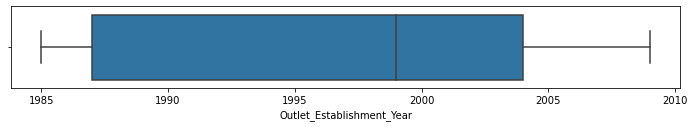

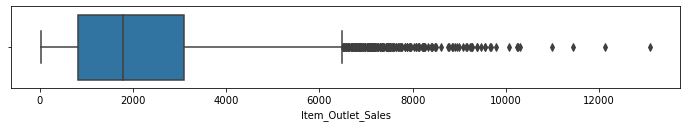

In [19]:
for column in num_cols:
    plt.figure(figsize=(12, 1.5))
    sns.boxplot(data_sm[column])

Therefore, not much changes to the outliers' distribution but the values in "Item_Visibility" has been ammended. The minimum value is no longer 0, it has changed to 1. 

[Back to top](#top)

## 3.3 Numerical Variables<a id="part3.3"></a>

### Distribution of Numerical Variables

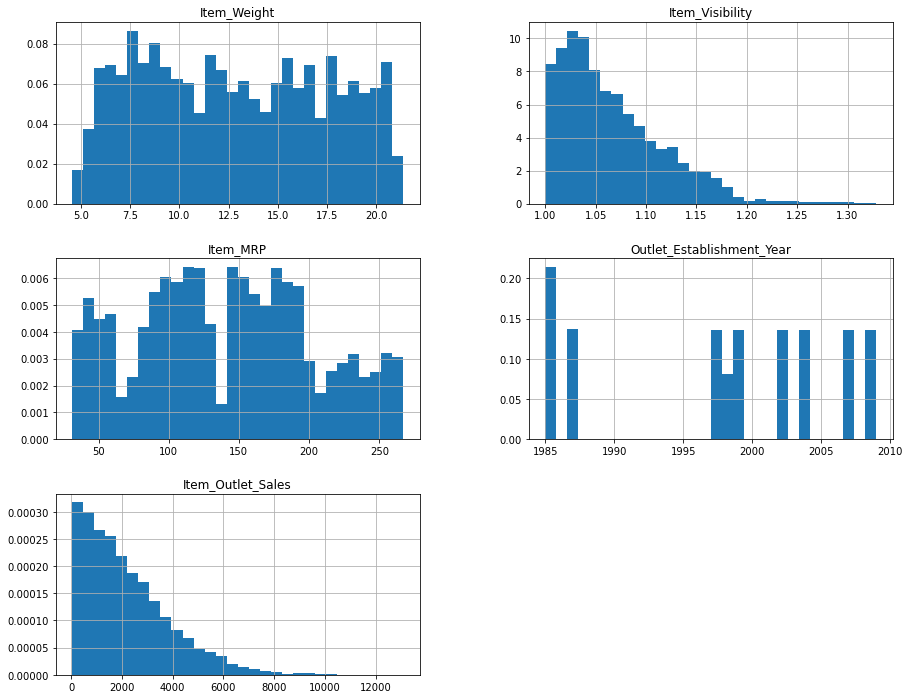

In [20]:
data_sm.hist(bins=30, figsize=(15,12), density=True)
plt.show()

I am not happy with the distributions of these variables. We are likely to use proper transformation methods to transform 'Item_Weight', 'Item_Visibility' and 'Item_MRP' after the Train Test Split and Missing Data Imputation process. It does not make sense to transform the 'Outlet_Establishment_Year' as it is given to have non-normality and as for the 'Item_Outlet_Sales', since it is the target variable, we should not transform it. 

[Back to top](#top)

## 3.4 Train and Test Split<a id="part3.4"></a>

In [21]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data_sm.drop('Item_Outlet_Sales', axis=1), data_sm['Item_Outlet_Sales'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((5966, 11), (2557, 11))

[Back to top](#top)

## 3.5 Missing Data<a id="part3.5"></a>
We will handle the Missing Data here.

In [22]:
X_train.isnull().sum().sort_values(ascending=True)

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Weight                  1021
Outlet_Size                  1681
dtype: int64

We will impute the missing values in "Item_Weight" and "Outlet_Size".

#### Item_Weight
Assuming that each unique "Item_Identifier" represents a specific item, it would be more reasonable to impute the missing values by the average "Item_Weight" of each "Item_Identifier" instead of doing the median imputation method as it would make the data biassed. 

In [23]:
#we will use this as reference 

X_train[['Item_Identifier', 'Item_Weight']].sort_values(by=['Item_Identifier']).head(10)

,Item_Identifier,Item_Weight
1245,DRA12,11.60
1197,DRA12,11.60
118,DRA12,11.60
1693,DRA12,11.60
4416,DRA24,NaN
1148,DRA24,19.35
2879,DRA24,NaN
6863,DRA24,19.35
8195,DRA24,19.35
8371,DRA59,8.27


[Reference for Last Value Replacement Method](https://towardsdatascience.com/using-pandas-transform-and-apply-to-deal-with-missing-data-on-a-group-level-cb6ccf060531)

In [24]:
# Upon researching, I discovered a way to impute missing values via the last value replacement
#.fillna(method='ffill') refers to forward-fill propagates the last observed non-null value forward
#.fillna(method='bfill') refers to backward-fill propagates the first observed non-null value backward

X_train['Item_Weight']=X_train.groupby('Item_Identifier')['Item_Weight'].fillna(method='ffill')
X_train['Item_Weight']=X_train.groupby('Item_Identifier')['Item_Weight'].fillna(method='bfill')

# apply to X_train as well
X_test['Item_Weight']=X_test.groupby('Item_Identifier')['Item_Weight'].fillna(method='ffill')
X_test['Item_Weight']=X_test.groupby('Item_Identifier')['Item_Weight'].fillna(method='bfill')

In [25]:
X_train[['Item_Identifier', 'Item_Weight']].sort_values(by=['Item_Identifier']).head(10)

,Item_Identifier,Item_Weight
1245,DRA12,11.60
1197,DRA12,11.60
118,DRA12,11.60
1693,DRA12,11.60
4416,DRA24,19.35
1148,DRA24,19.35
2879,DRA24,19.35
6863,DRA24,19.35
8195,DRA24,19.35
8371,DRA59,8.27


Refer to row 2879, we can see that the NaN value is now replaced by the similar value of "Item_Weight" of the same "Item_Identifier".

Now, let's check if there are still Nan values in "Item_Weight".

In [26]:
check = X_train[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])
nan = check[check['Item_Weight'].isna()]
nan

,Item_Identifier,Item_Weight
3721,FDD46,NaN
1033,FDE50,NaN
4187,FDE52,NaN
8125,FDI04,NaN
359,FDJ56,NaN
4767,FDN44,NaN
4688,FDO03,NaN
6980,FDO46,NaN
4457,FDO49,NaN
7558,FDP13,NaN


After checking, there are still missing values in "Item_Weight". This happened because these Items do not have previous "Item_Weight" values. Therefore, we will impute the null values with the mean imputer.

In [27]:
#let's create a mean imputer

imputer = MeanMedianImputer(imputation_method='mean',
                                   variables=['Item_Weight'])

imputer.fit(X_train)

MeanMedianImputer(imputation_method='mean', variables=['Item_Weight'])

In [28]:
#Inspect the value
imputer.imputer_dict_

{'Item_Weight': 12.945571260306203}

In [29]:
X_train = imputer.transform(X_train)

# apply to X_train as well
X_test = imputer.transform(X_test)

### Outlet_Size

Initially, I wanted to use the frequent imputation method to impute the missing values for Outlet_Size but I felt that this would cause the data to be very "biassed" as there will be a higher number of Medium outlets, dominating the Outlet_Size column. 

Initial Working:
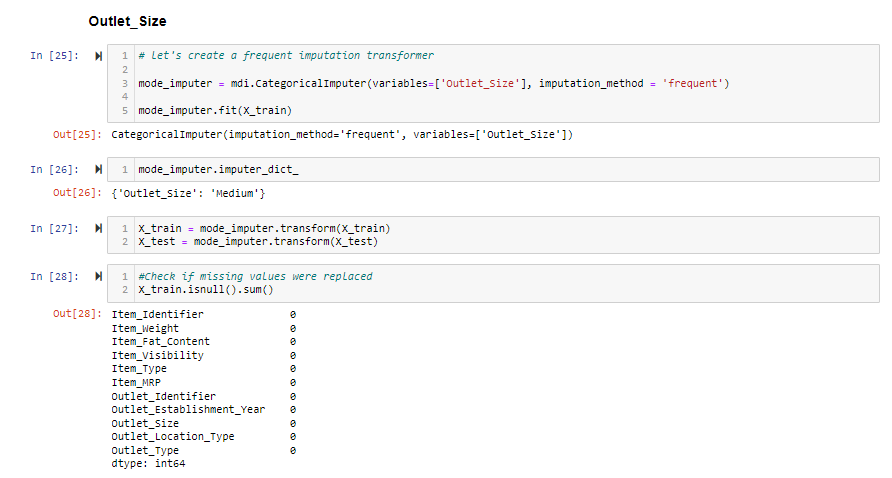

Therefore, I have decided to study "Outlet_Size" further so I can impute more reasonable values for it. We will start first by grouping outlet types and outlet sizes, then calculate the total count of Item Identifier.

In [30]:
data_sm.groupby(['Outlet_Type', 'Outlet_Size'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Outlet_Size'], ascending=False).style.background_gradient(cmap='GnBu_r')

,Outlet_Type,Outlet_Size,Item_Identifier
0,Grocery Store,Small,528
4,Supermarket Type1,Small,1311
3,Supermarket Type1,Medium,930
6,Supermarket Type2,Medium,928
7,Supermarket Type3,Medium,935
2,Supermarket Type1,High,932
1,Grocery Store,nan,555
5,Supermarket Type1,nan,1305


Based on the table above, Grocery Store should be imputed with "Small" as the count of "Item_Identifier" are similar. Whereas for Supermarket Type1, there are various outlet sizes but the count of "Item_Identifier" is the closest to row '4' whereby the outlet size is small. Hence instead of imputing the missing values to "Medium" via the frequency imputator, we can impute the missing values to "Small" instead as it has more rationale behind it.

In [31]:
X_train['Outlet_Size'] = X_train['Outlet_Size'].replace(np.nan, 'Small')

#apply to X_test as well 
X_test['Outlet_Size'] = X_test['Outlet_Size'].replace(np.nan, 'Small')                                                                                                       

In [32]:
# Check if the missing values are replaced

X_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

[Back to top](#top)

# 4.Data Transformation<a id="part4"></a>

## 4.1 Numerical Data Transformation<a id="part4.1"></a>

We will transform 'Item_Weight', 'Item_Visibility' and 'Item_MRP here.

### Preparing for Numerical Transformation 

In [33]:
# create a copy of the dataframe 

X_train2 = X_train.copy(deep=True)
variables_toTransform = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
X_train2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
88,FDN33,6.305,Regular,1.123116,Snack Foods,95.6436,OUT046,1997,Small,Tier 1,Supermarket Type1
6813,FDY31,5.980,Low Fat,1.043809,Fruits and Vegetables,146.8418,OUT017,2007,Small,Tier 2,Supermarket Type1
4046,NCH54,13.500,Low Fat,1.072317,Household,160.7920,OUT027,1985,Medium,Tier 3,Supermarket Type3
8194,FDY15,18.250,Regular,1.299098,Dairy,157.8630,OUT019,1985,Small,Tier 1,Grocery Store
8293,NCT30,9.100,Low Fat,1.080278,Household,47.2718,OUT035,2004,Small,Tier 2,Supermarket Type1


In [34]:
# plot histogram and Q-Q plots to have a look at the variable distribution

def diagnostic_plots_NUM(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)


    plt.show()

This function will help us observe the changes from the transformation and help us decide which transformation is the best. 

### Applying the Transformation 

In [35]:
# Square root transformation
for column in variables_toTransform:
    X_train2[column+'_square']=X_train2[column]**(1/2)

In [36]:
# cube root transformation
for column in variables_toTransform:
    X_train2[column+'_cube']=X_train2[column]**(1/3)

In [37]:
# Log Transformation
for column in variables_toTransform:
    X_train2[column+'_log'] = np.log(X_train2[column])

In [38]:
# Reciprocal transformation
for column in variables_toTransform:
    X_train2[column+'_rec']=1/(X_train2[column])

In [39]:
def compare_transf(df,feature):
    compare=X_train2[[feature+'_square', feature+'_cube', feature+'_rec', feature+'_log']].copy()
    for column in compare:
        print(column)
        diagnostic_plots_NUM(compare, column)

In [40]:
# check that the transformations are done

X_train2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_MRP_square,Item_Weight_cube,Item_Visibility_cube,Item_MRP_cube,Item_Weight_log,Item_Visibility_log,Item_MRP_log,Item_Weight_rec,Item_Visibility_rec,Item_MRP_rec
88,FDN33,6.305,Regular,1.123116,Snack Foods,95.6436,OUT046,1997,Small,Tier 1,...,9.779755,1.847403,1.039461,4.573184,1.841343,0.116107,4.560629,0.158604,0.890380,0.010455
6813,FDY31,5.980,Low Fat,1.043809,Fruits and Vegetables,146.8418,OUT017,2007,Small,Tier 2,...,12.117830,1.815099,1.014395,5.275738,1.788421,0.042877,4.989356,0.167224,0.958029,0.006810
4046,NCH54,13.500,Low Fat,1.072317,Household,160.7920,OUT027,1985,Medium,Tier 3,...,12.680379,2.381102,1.023547,5.437778,2.602690,0.069822,5.080112,0.074074,0.932560,0.006219
8194,FDY15,18.250,Regular,1.299098,Dairy,157.8630,OUT019,1985,Small,Tier 1,...,12.564354,2.632819,1.091140,5.404557,2.904165,0.261670,5.061728,0.054795,0.769765,0.006335
8293,NCT30,9.100,Low Fat,1.080278,Household,47.2718,OUT035,2004,Small,Tier 2,...,6.875449,2.087759,1.026073,3.615769,2.208274,0.077218,3.855914,0.109890,0.925688,0.021154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,NCN29,15.200,Low Fat,1.020280,Health and Hygiene,49.1034,OUT010,1998,Small,Tier 3,...,7.007382,2.477125,1.006715,3.661878,2.721295,0.020078,3.893928,0.065789,0.980123,0.020365
7891,FDP21,7.420,Regular,1.025616,Snack Foods,188.1872,OUT027,1985,Medium,Tier 3,...,13.718134,1.950449,1.008467,5.730555,2.004179,0.025294,5.237437,0.134771,0.975024,0.005314
4859,FDO22,13.500,Regular,1.000000,Snack Foods,78.3960,OUT035,2004,Small,Tier 2,...,8.854152,2.381102,1.000000,4.279877,2.602690,0.000000,4.361773,0.074074,1.000000,0.012756
3264,FDI52,18.700,Low Fat,1.104890,Frozen Foods,121.4072,OUT045,2002,Small,Tier 2,...,11.018494,2.654283,1.033808,4.951630,2.928524,0.099746,4.799150,0.053476,0.905067,0.008237


Scroll to the end and you will see that new columns are created with the transformed value of each variable. 

### 4.1.1 Numerical Transformation of Item_Weight <a id="part4.1.1"></a>

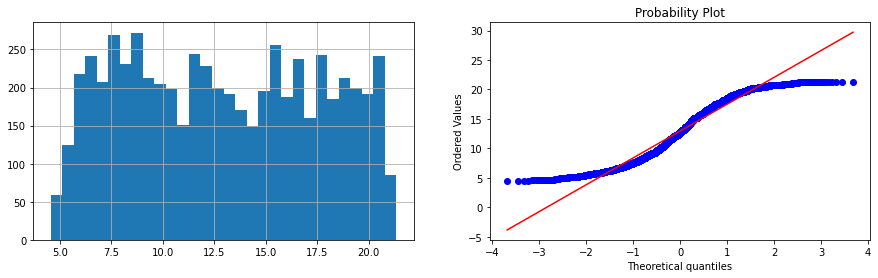

In [41]:
# Original Distribution 
diagnostic_plots_NUM(X_train2, 'Item_Weight')

Item_Weight_square


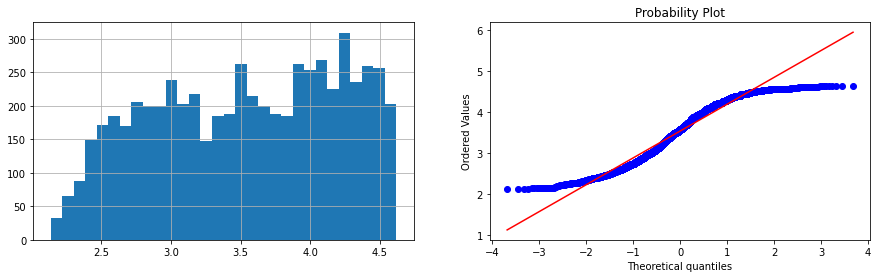

Item_Weight_cube


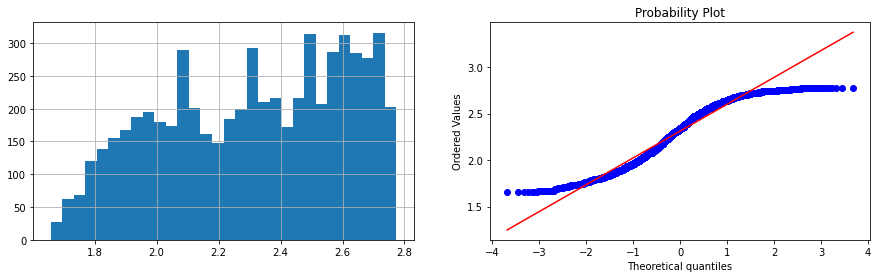

Item_Weight_rec


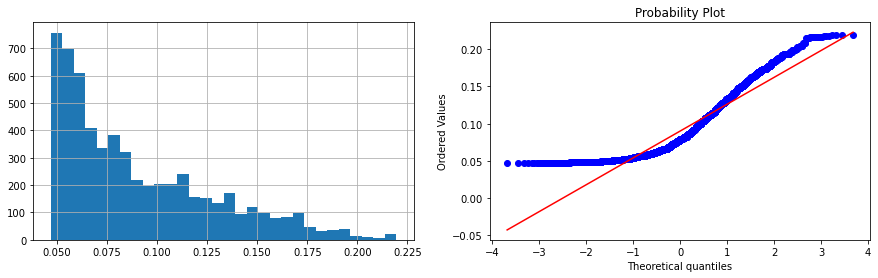

Item_Weight_log


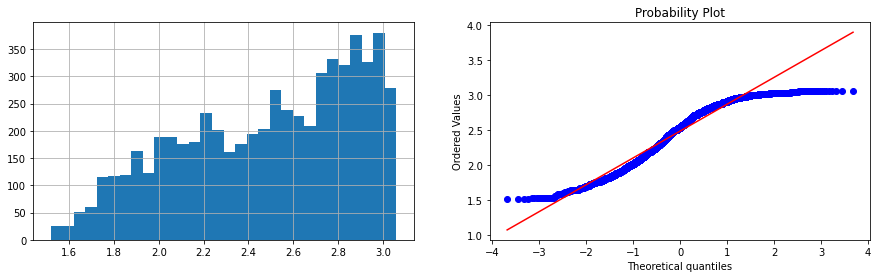

In [42]:
compare_transf(X_train2,'Item_Weight')

After comparing to the original distribution, I think either the square root or cube root transformation works best for "Item_Weight". They both produced similar results.

### 4.1.2 Numerical Transformation of Item_Visibility <a id="part4.1.2"></a>

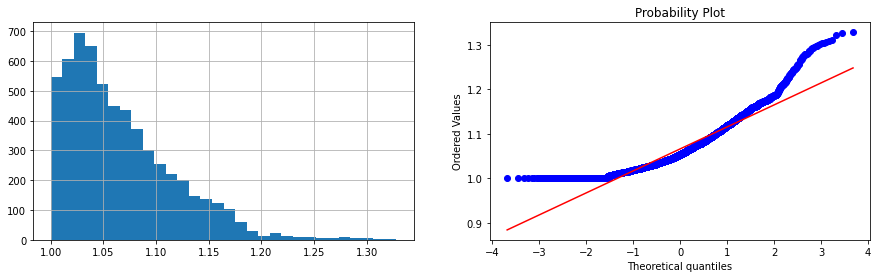

In [43]:
# Original Distribution 
diagnostic_plots_NUM(X_train2, 'Item_Visibility')

Item_Visibility_square


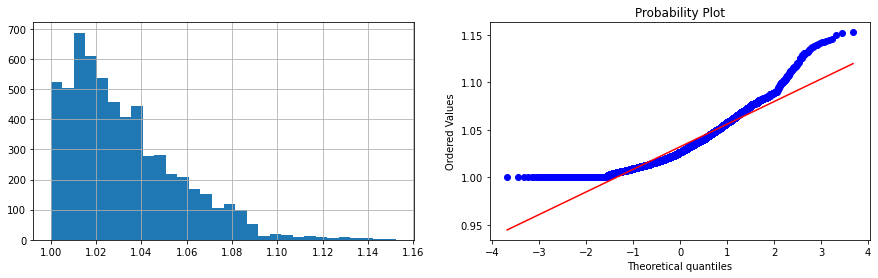

Item_Visibility_cube


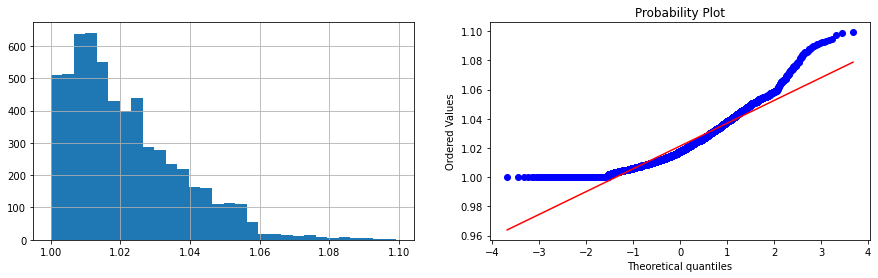

Item_Visibility_rec


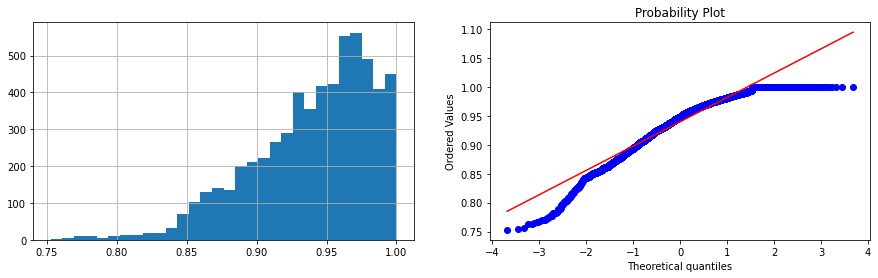

Item_Visibility_log


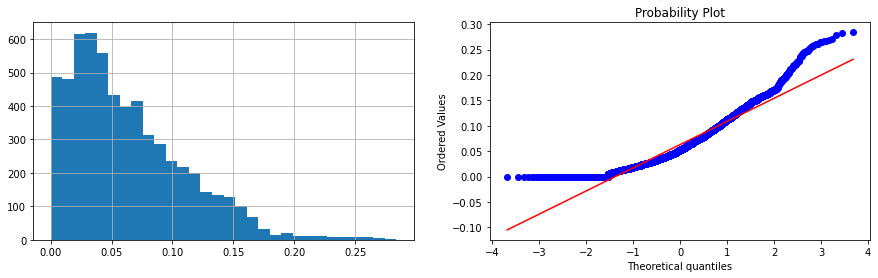

In [44]:
compare_transf(X_train2,'Item_Visibility')

After comparing to the original distribution, I think the cube root transformation works best for "Item_Visibilty". 

### 4.1.3 Numerical Transformation of Item_MRP <a id="part4.1.3"></a>

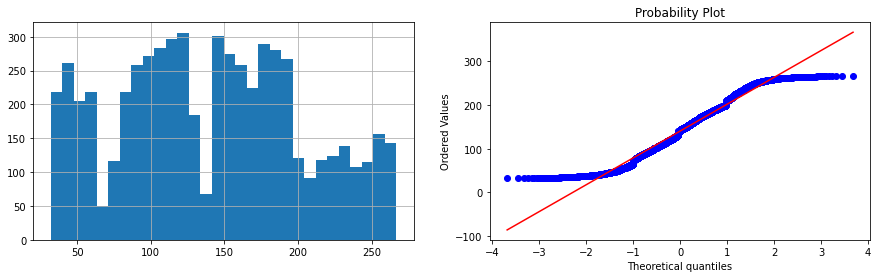

In [45]:
# Original Distribution 
diagnostic_plots_NUM(X_train2, 'Item_MRP')

Item_MRP_square


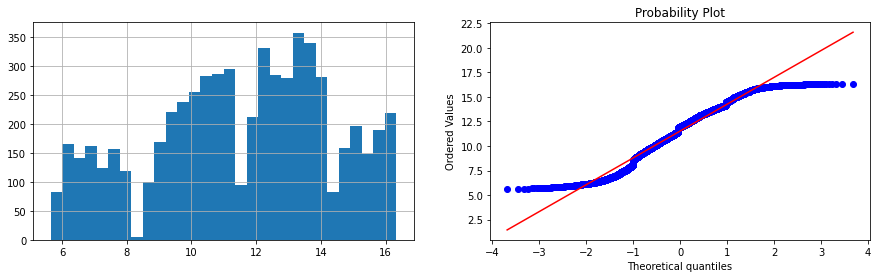

Item_MRP_cube


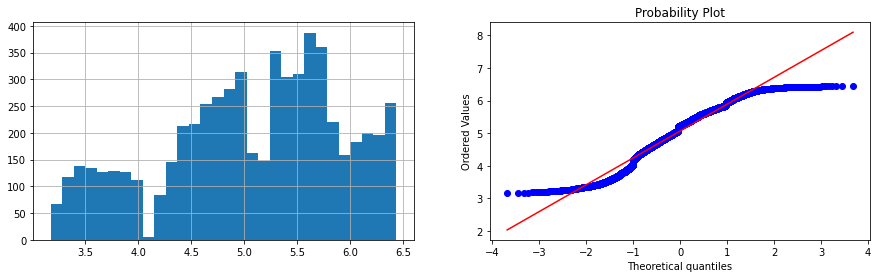

Item_MRP_rec


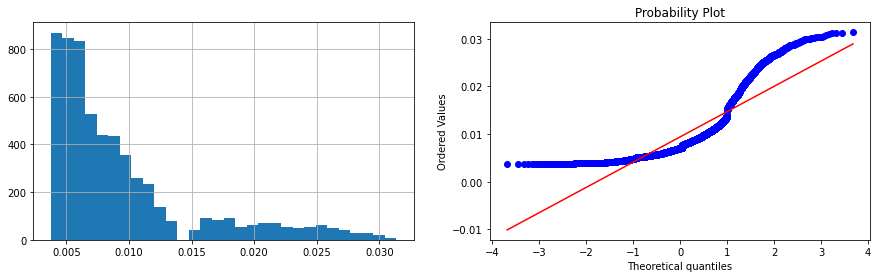

Item_MRP_log


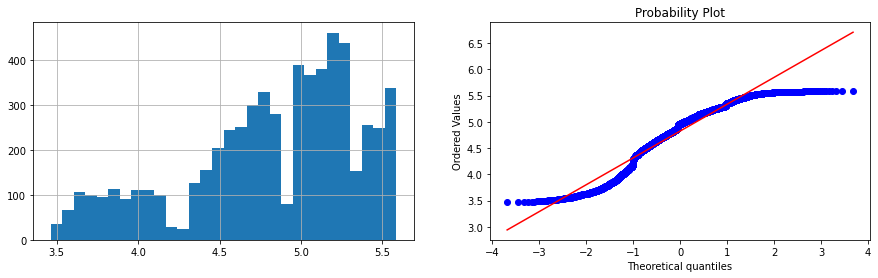

In [46]:
compare_transf(X_train2,'Item_MRP')

After comparing to the original distribution, I think that none of the transformation makes it better so "Item_MRP" should not be transformed. The transformed distribution is worse than the original distribution. 

Based on these comparisons, I have concluded that square/cube transformation is the best for "Item_Weight" and "Item_Visibility" and we should not transform "Item_MRP". 

Now, let's apply the transformation methods to X_train and X_test. 

In [47]:
Transformer = PowerTransformer(variables = ['Item_Weight'], exp=1/3)

# fit transformer to data 
Transformer.fit(X_train)

# transform X_train and X_test
X_train = Transformer.transform(X_train)
X_test = Transformer.transform(X_test)

Transformer = PowerTransformer(variables = ['Item_Visibility'], exp=1/2)

# fit transformer to data 
Transformer.fit(X_train)

# transform X_train and X_test
X_train = Transformer.transform(X_train)
X_test = Transformer.transform(X_test)

I have compared the square root and cube root method as they produced similar results.

Square root results:

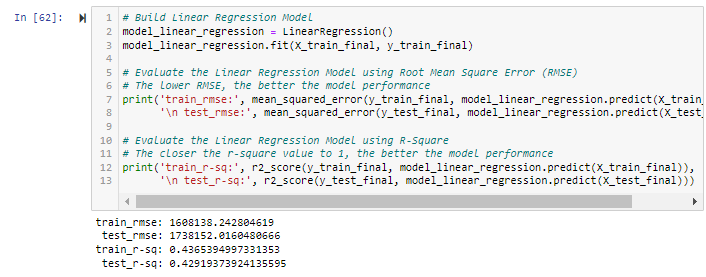

Cube root results:
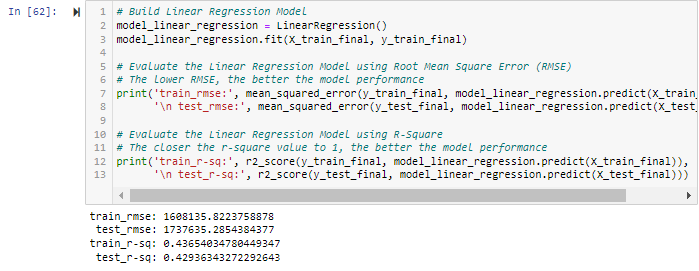

However, by combining the two methods, Square Root for "Item_Weight" and Cube Root for "Item_Visibility", the model result was better than just using one method for both variables.

Therefore, in my code, I have done both the Square Root and Cube Root methods. 

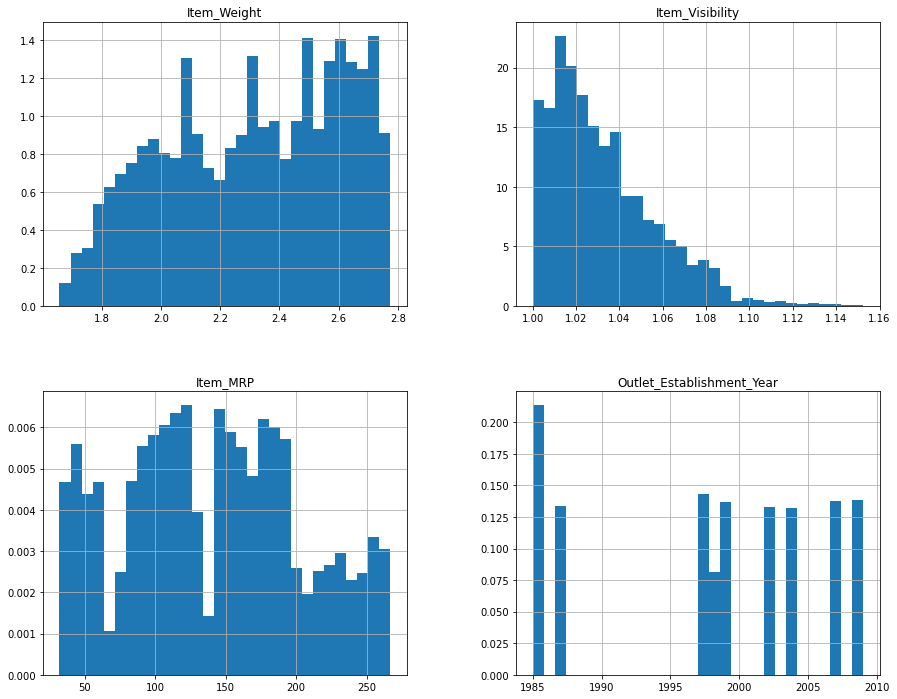

In [48]:
X_train.hist(bins=30, figsize=(15,12), density=True)
plt.show()

[Back to top](#top)

## 4.2 Categorical Data Encoding<a id="part4.2"></a>

### 4.2.1 Ordinal Encoding<a id="part4.2.1"></a>

We will do Ordinal Encoding for variables with not many unique values.

These variables include "Item_Fat_Content", "Outlet_Size", "Outlet_Location_Type" and"Outlet_Type".
However, we will need to do some replacement of values for non-consumables products in "Item_Fat_Content" hence we will encode this later.

In [49]:
ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

ordinal_enc.fit(X_train)

X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

### 4.2.2 Target Mean Encoding<a id="part4.2.2"></a>

We will do Target Mean Encoding for variables with many unique values.

These variables include "Item_Identifier", "Item_Type" and "Outlet_Identier".
However, we will need "Item_Identifier" to do some replacement of values for non-consumables products in "Item_Fat_Content" hence we will encode this later. 

In [50]:
encoder = MeanEncoder(variables=['Item_Type', 'Outlet_Identifier'])

# fit the encoder
encoder.fit(X_train, y_train)

# transform the data
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

[Back to top](#top)

## 4.3 Variable Discretization/Binning<a id="part4.3"></a>

In [51]:
disc = EqualFrequencyDiscretiser(q=10, variables = ['Item_Weight', 'Item_Visibility', 'Item_Weight'])

disc.fit(X_train)

X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

Equal Frequency Discretization performmed slightly better for test score compared to Equal width Discretization.

With Equal Width:
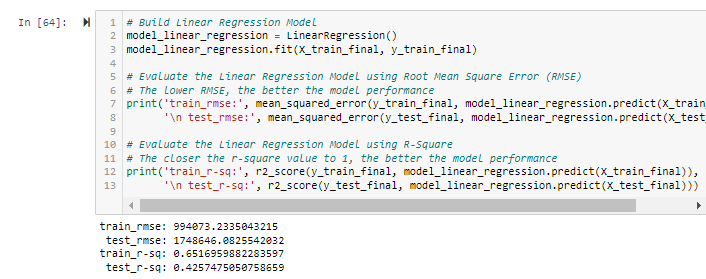

With Equal Frequency:
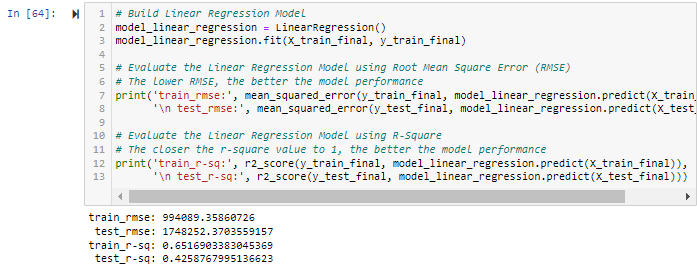

Therefore we will go with the Equal Frequency Discretization as it suits our data better and performs better results for our model. As you can see our model results did worse when we tried the Equal Frequency method. 

Increased bins value to 20:
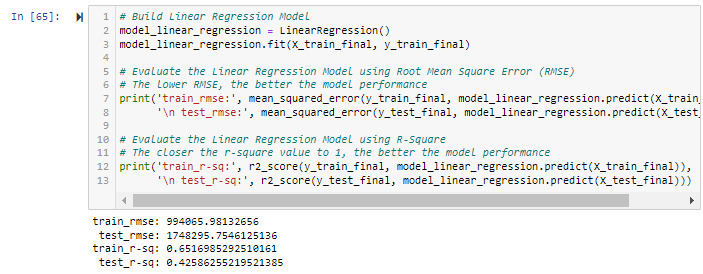

The results of the model worsened slightly when I increased the number of bins to 20 hence, we will be sticking to 10 bins.

[Back to top](#top)

# 5. Feature Enginnering<a id="part5"></a>

## 5.1 Create New Columns<a id="part5.1"></a>

### Item Type Category

Upon looking at the "Item_Identifier values, I realised that there is a trend in the naming convention whereby the first 2 letters are either 'FD', 'NC' or 'DR'. Therefore we will be creating a column called "Item_Type_Category'' to split our "Item_Identifier" which contains too many values. 


In [52]:
X_train['Item_Type_Category'] = X_train['Item_Identifier'].astype(str).str[:2]
X_train['Item_Type_Category'].unique()


array(['FD', 'NC', 'DR'], dtype=object)

FD will be classified as food products, DR as drink products, and NC as non-consumable.

In [53]:
#Create a new Item_category based on first 2 letters in "Item_Identifier"
# FD -> Food
# DR -> Drinks
# NC -> Non-Consumable

X_train['Item_Type_Category'] = X_train['Item_Type_Category'].map({'FD': 'Food', 'DR':'Drink', 'NC':'Non-Consumable'})

# apply to X_test as well
X_test['Item_Type_Category'] = X_test['Item_Identifier'].astype(str).str[:2]
X_test['Item_Type_Category'] = X_test['Item_Type_Category'].map({'FD': 'Food', 'DR':'Drink', 'NC':'Non-Consumable'})

This would help us to replace values for non-consumables in "Item_Fat_Content" which will be done right after this. 

### Replacing values for Non-Consumables in "Item_Fat_Content"

Previously, we found out that there are non-consumables products having either 'Low Fat' or 'Regular' attached to them hence we should create another value in "Item_Fat_Content" to avoid misrepresentation. 

In [54]:
X_train.loc[X_train['Item_Type_Category']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
X_train['Item_Fat_Content'].value_counts()

Low Fat       2724
Regular       2103
Non-Edible    1139
Name: Item_Fat_Content, dtype: int64

In [55]:
# apply to X_test as well
X_test.loc[X_test['Item_Type_Category']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
X_test['Item_Fat_Content'].value_counts()

Low Fat       1194
Regular        903
Non-Edible     460
Name: Item_Fat_Content, dtype: int64

We have improved the accuracy of the data by replacing the values. 

We will now encode the new column we have created ("Item_Type_Category") and the previously two variables that were not encoded as we needed them for this portion ("Item_Fat_Content" and "Item_Identifier"). 

In [56]:
# apply encoding 

# ordinal for 'Item_Type_Category' and "Item_Fat_Content" 
ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=['Item_Type_Category', 'Item_Fat_Content'])

ordinal_enc.fit(X_train)

X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

# target mean for "Item_Identifier"
encoder = MeanEncoder(variables='Item_Identifier')

# fit the encoder
encoder.fit(X_train, y_train)

# transform the data
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

### Outlet Age 

We mentioned previously that "Outlet_Establishment_Year" is not that useful hence instead of using it, we can create a new column called 'Outlet_Age' which calculates the outlet's age by using the current year, 2022 minus the outlet establishment year. 

In [57]:
X_train['Outlet_Age'] = 2022 - X_train['Outlet_Establishment_Year']

# apply to X_test as well
X_test['Outlet_Age'] = 2022 - X_test['Outlet_Establishment_Year']

[Back to top](#top)

## 5.2 Dropping Columns<a id="part5.2"></a>

In [58]:
X_train.drop(columns=['Outlet_Establishment_Year'], inplace=True)

# apply to X_test as well
X_test.drop(columns=['Outlet_Establishment_Year'], inplace=True)

Since we have created a column "Outlet_Age" to replace "Outlet_Establishment_Year", we can drop "Outlet_Establishment_Year".

In [59]:
# inspect the values to make sure all changes are applied

X_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Category,Outlet_Age
88,1701.784800,0,0,8,2262.239666,95.6436,2261.483146,0,0,0,0,25
6813,2599.505133,0,1,4,2203.242015,146.8418,2332.127409,0,1,0,0,15
4046,1470.086400,9,2,6,2263.643850,160.7920,3663.008639,1,2,1,1,37
8194,2164.404833,9,0,9,2176.137036,157.8630,344.448863,0,0,2,0,37
8293,529.444160,1,2,6,2263.643850,47.2718,2405.923872,0,1,0,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...
4373,352.374650,9,2,1,2021.375846,49.1034,335.423847,0,2,2,1,24
7891,3970.831200,0,0,2,2262.239666,188.1872,3663.008639,1,2,1,0,37
4859,958.752000,9,0,0,2262.239666,78.3960,2405.923872,0,1,0,0,18
3264,1788.605120,9,1,7,2149.676397,121.4072,2228.956028,0,1,0,0,20


[Back to top](#top)

## 5.3 Scaling<a id="part5.3"></a>
We will be comparing Standardization and MinMix scaler.

Standardization is the process of centering the variable at zero and standardizing the variance to 1. This is helpful for the model to compare data corresponding to the units. By standardization, we remove the units of each variable by subtracting the mean from each observation and then divide the result by the standard deviation:

\begin{equation}
z = \frac{x - mean(x)}{std(x)}
\end{equation}

On the other hand, Scaling to the minimum and maximum values squeezes the values of the variables between 0 and 1. To implement this scaling technique, we need to subtract the minimum value from all the observations and divide the result by the value range, that is, the difference between the maximum and minimum values:

\begin{equation}
x_{scaled} = \frac{x - min(x)}{max(x) - min(x)}
\end{equation}

Standardization is good for data that is following Gaussian distribution while MinMax Scaling is good for data that is NOT following the Guassian distribution.

So let's first study the distribution of our X_train.

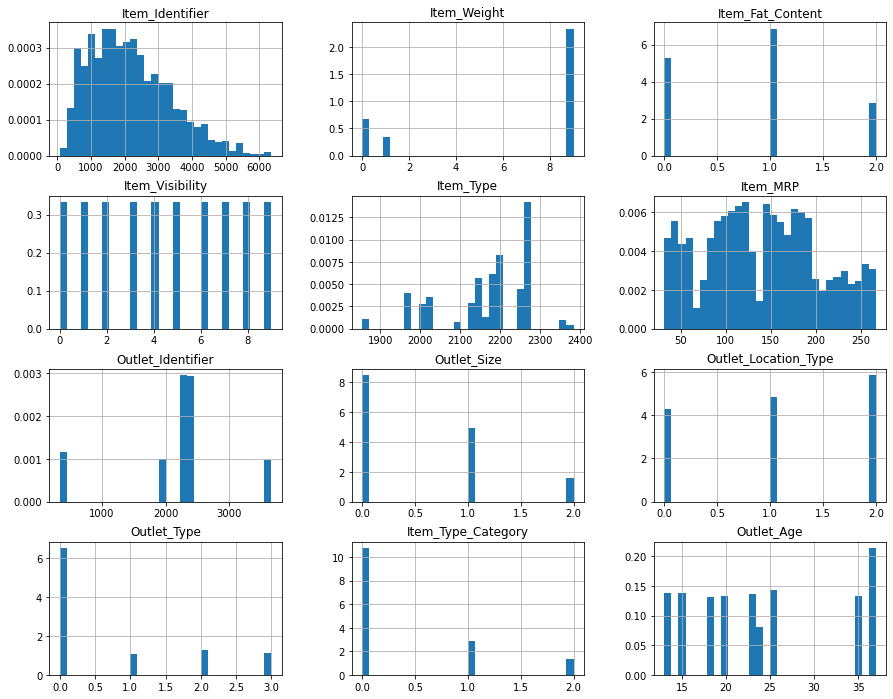

In [60]:
X_train.hist(bins=30, figsize=(15,12), density=True)
plt.show()

It seems like the MinMax scaler will suit our X_train better as most of the variables do not follow a normal distribution.

In [61]:
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# let's transform the returned NumPy arrays to dataframes
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

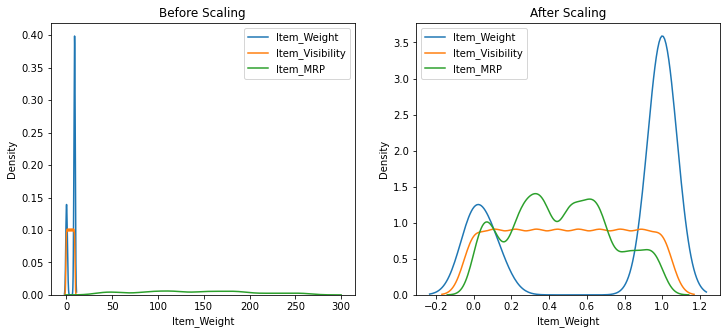

In [62]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Item_Weight'], ax=ax1, label ='Item_Weight')
sns.kdeplot(X_train['Item_Visibility'], ax=ax1, label ='Item_Visibility')
sns.kdeplot(X_train['Item_MRP'], ax=ax1, label ='Item_MRP')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled_df['Item_Weight'], ax=ax2, label ='Item_Weight')
sns.kdeplot(X_train_scaled_df['Item_Visibility'], ax=ax2, label ='Item_Visibility')
sns.kdeplot(X_train_scaled_df['Item_MRP'], ax=ax2, label ='Item_MRP')
ax2.legend()
plt.show()

After comparing the MinMax Scaler and Standard Scaler, I realised that they produce the same model results. Hence, we can conclude that the different scaler does not affect the model result but I will still choose the MinMax scaler as it suits my X_train better. By performing Feature Engineering, our train score improves but test score becomes slightly worse.

Before doing Feature Engineering:
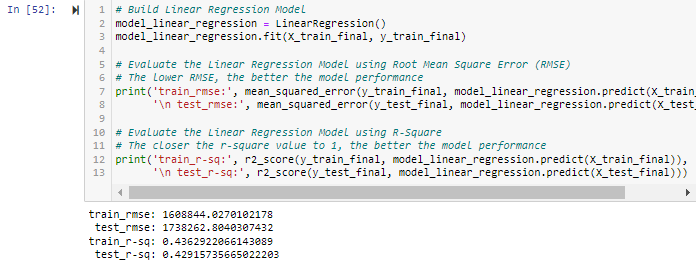

After doing Feature Engineering:
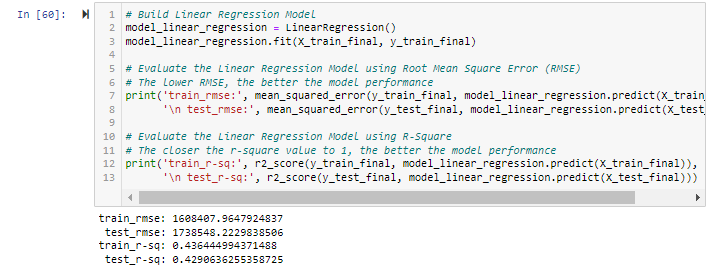

[Back to top](#top)

# 6. Linear Regression Modelling<a id="part6"></a>

Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).

Before we build and evaluate our model, we need to:
### Replacing null values in X_train

X_train_scaled and X_test_scaled contains my final versions of X_train and X_test. Whatever I have applied on X_train has been applied to X_test. However, I would get an error when I try to evaluate the model.

Error:
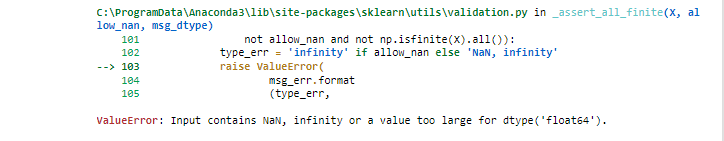

So before we can evaluate the model, let's solve this error and try and understand what caused this error.

In [63]:
np.any(np.isnan(X_train_scaled_df))

False

In [64]:
np.all(np.isfinite(X_train_scaled_df))

True

Seems like there is no problem with X_train data.

In [65]:
np.any(np.isnan(X_test_scaled_df))

True

In [66]:
np.all(np.isfinite(X_test_scaled_df))

False

Now, the problem lies in X_test. This likely happened because some values that have not appeared in X_train, appeared in X_test hence they were not due with because our main focus was X_train and we transform X_test according to X_train. 

We should try and study the null and infinite values present in X_test so we can do relevant replacement of values.

We should try and replace the values in X_test.

In [67]:
X_test_scaled_df.isnull().sum()

Item_Identifier         23
Item_Weight              0
Item_Fat_Content         0
Item_Visibility          0
Item_Type                0
Item_MRP                 0
Outlet_Identifier        0
Outlet_Size              0
Outlet_Location_Type     0
Outlet_Type              0
Item_Type_Category       0
Outlet_Age               0
dtype: int64

There are surprisingly some Item_Identifier that have null values in X_test.

We will use a similar method that we used to replace "Item_Weight" null values.

In [68]:
X_test_scaled_df['Item_Identifier']=X_test_scaled_df.groupby('Item_Weight')['Item_Identifier'].fillna(method='ffill')
X_test_scaled_df['Item_Identifier']=X_test_scaled_df.groupby('Item_Weight')['Item_Identifier'].fillna(method='bfill')

In [69]:
X_test_scaled_df.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Type_Category      0
Outlet_Age              0
dtype: int64

[Back to top](#top)

### Building and Evaluating the Model
In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Root Mean Square Error (RMSE): The RMSE is the square root of the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of RMSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

In [70]:
# assign your fully cleaned and transformed data contained within your versions of 
# X_train_student_final_premodel_version, X_test_student_final_premodel_version,
# y_train_student_final_premodel_version and y_test_student_final_premodel_version into
# the prepared variables below, for a simple linear regression model

X_train_student_final_premodel_version = X_train_scaled_df
X_test_student_final_premodel_version = X_test_scaled_df

y_train_student_final_premodel_version = y_train
y_test_student_final_premodel_version = y_test

In [71]:
X_train_final = X_train_student_final_premodel_version
X_test_final = X_test_student_final_premodel_version

y_train_final = y_train_student_final_premodel_version
y_test_final = y_test_student_final_premodel_version

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [73]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Root Mean Square Error (RMSE)
# The lower RMSE, the better the model performance
print('train_rmse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_rmse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_rmse: 994089.35860726 
 test_rmse: 1740900.2290119727
train_r-sq: 0.6516903383045369 
 test_r-sq: 0.4282912306280632


Throughout this whole notebook, I have done many steps to cleanse, transform and engineer the original dataset. We will now look at the combinations of steps I have used for my final X_train and X_test. 

#### Outlier Removal 
Did not handle the outliers, added 1 to all values in “Item_Visibility”

#### Missing Value Imputation
Last Value Replacement, Mean Imputer, Simple Replace Values

#### Numerical Transformation
Cube Root Transformation, Sqaure Root Transformation

#### Categorical Encoding
Ordinal Encoding, Target Mean Encoding 

#### Variable Discretization / Binning
Equal Frequency Discretiser

#### Scaling
MinMax Scaler


The reason why I did not handle the outliers was because I believe that the outliers in “Item_Visibility” is important and it makes sense that outliers were present due to the various sizes of products in a supermarket, items with bigger surface area would definitely have more visibility hence I do not think that we should handle them.

The missing values imputation methods were chosen based on what suits the variable the most. Last Value Replacement method suits “Item_Weight” as we can refer to the same “Item_Identifier” for the item’s weight and this would not be as biassed as the mean imputer. However, Mean Imputer is used for Items which do not have previous "Item_Weight" values. As for “Outlet_Size” instead of just using the frequency imputer, I studied further into the null values and imputed a more reasonable value for it.

For the Numerical Transformation, I chose Cube Root for "Item_Weight" as the model performed better and also because the Square and Cube Root Transformation had similar transformation results for it. Whereas for "Item_Visibility", I did Square Root Transformation as it transformed the variable better than other methods. The combination of these two transformation method produced the best model results.

Categorical Encoding was done differently based on the number of unique values the variable had. Variables with less unique values were encoded with the Ordinal Encoder whereas for variables with high numbers of unique values, I used the Target Mean Encoder. 

Variable binning was done on 3 variables, Item_Weight, Item_Visibility and item_MRP. The reason why I chose Equal Frequency Discretizer over Equal Width Discretizer is merely because it performs better model results.

Lastly, even though the choice of the scaler did not affect my model results at all but MinMax Scaler suits the distribution of X_train better hence I chose MinMax Scaler over Standard Scaler.


[Back to top](#top)

# 7. Summary <a id="part7"></a>

In conclusion, I have experimented on different data processing methods to inorder to get my ‘best’ model result. There are many methods in the world that we can use to handle outliers, impute missing data or transform our data but the method chosen must suit our variables. In order to find the most suitable method, we need to understand our data well, which is a step often missed by a lot of people. I have spent an ample amount of time exploring the data because it is important to understand the relationships between the variables and study each variable.

However, I have selected the methods based on my basic understanding of what each method does so I was not able to experiment on ALL the methods that were taught. For instance, I did not use the Box-Cox method for numerical transformation and did not try out discretizing a variable into predefined intervals for Discretization. So I will not know if these methods help in my model. So an improvement that can be is to try out other methods because I might be able to achieve better model results if I tested these methods with my model: 

#### Numerical Transformation
Box-Cox transformation, Yeo-Johnson transformation
#### Categorical Encoding
One-Hot encoding, Replace with counts of frequency
#### Variable Discretization/Binning
Arbitrary Interval Discretization
#### Scaling
Mean Normalization, Maximum Absolute Scaling, Robust Scaling 

We will never know if these methods might unexpectedly have an outstanding effect on the model until we actually test them out.

[Back to top](#top)